## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
X.shape

(50,)

In [4]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

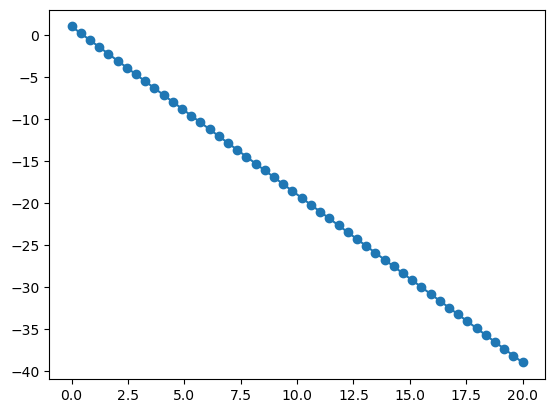

In [5]:
plt.plot(X , y ,  marker = "o")
plt.show()

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [6]:
def gredint (  X , Y , Alpha , Itration ):
    theta_0 = 0
    theta_1 = 0
    loss=[]
    theta0=[]
    theta1=[]
    h_prdict=[]
    j=0
    callback=0
    for i in range( 0 , Itration):
        print("---------------iteration-----------",i)
        print()
        h_x = theta_0 + theta_1 * X
        h_prdict.append(h_x)
        print("h(x):",h_x)
        print()
        Erorr = h_x - Y
        print("Error Vector:", Erorr)
        print()
        M = len(X)
        old_loss=j
        j = 1/(2*M) * sum(Erorr**2)
        if abs(old_loss - j) < 0.001:
            callback+=1
            print("j:", j)
            print()
        d_theta_0 = (1/M) * sum(Erorr)
        d_theta_1 = (1/M) * sum((Erorr)*X)
        arr = np.array([[d_theta_0],[d_theta_1]])
        print("Gradient Vector:\n", arr)
        print()
        norm_g = np.linalg.norm(arr)
        print("Gradient Vector Norm:\n", norm_g)
        print()
        if norm_g <= 0.001 or j <= 0.001 or callback==2:
            break
        theta_0 = theta_0 - (Alpha * d_theta_0)
        theta0.append(theta_0)
        print("theta_0_new:", theta_0)
        print()
        theta_1 = theta_1 - (Alpha * d_theta_1)
        theta1.append(theta_1)
        print("theta_1_new:", theta_1)
        print()
        loss.append(j)
        
    print()        
    print("--------------------training report--------------------") 
    print()
    theta_0_opt = theta_0
    print("theta_0_opt:", theta_0_opt)
    theta_1_opt = theta_1
    print("theta_1_opt:", theta_1_opt)
    print()
    h_x = theta_0 + theta_1*X
    Erorr = h_x - y
    print("Error Vector:\n", Erorr)
    print()
    M = len(X)
    j = 1/(2*M) * sum(Erorr**2)
    print("\n cost", j)
    print()
    print("\n h(x) = y_predict:\n", h_x)
    print()
    print("\n y_actual \n", y)

    return loss, h_x, y, i, theta0, theta1, h_prdict
    
     

In [7]:
loss, y_predict, y, epoch, theta_0, theta_1, h_prdict = gredint(X,y,0.0005, 300)


---------------iteration----------- 0

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector: [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

Gradient Vector:
 [[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
 260.0826935743251

theta_0_new: -0.0095

theta_1_new: -0.1296938775510204

---------------iteration----

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.0095
theta_1_new : -0.12969387


Gradient Vector Norm:
3.150846624874574

theta_0_new : -0.13151756202565473
theta_1_new : -1.8941776723448396

****************** Iteration 64 ********************

h(x):
[ -0.13151756  -0.90465131  -1.67778505  -2.45091879  -3.22405254
  -3.99718628  -4.77032002  -5.54345377  -6.31658751  -7.08972126
  -7.862855    -8.63598874  -9.40912249 -10.18225623 -10.95538998
 -11.72852372 -12.50165746 -13.27479121 -14.04792495 -14.82105869
 -15.59419244 -16.36732618 -17.14045993 -17.91359367 -18.68672741
 -19.45986116 -20.2329949  -21.00612865 -21.77926239 -22.55239613
 -23.32552988 -24.09866362 -24.87179736 -25.64493111 -26.41806485
 -27.1911986  -27.96433234 -28.73746608 -29.51059983 -30.28373357
 -31.05686731 -31.83000106 -32.6031348  -33.37626855 -34.14940229
 -34.92253603 -35.69566978 -36.46880352 -37.24193727 -38.01507101]

Error Vector:
[-1.13151756 -1.08832478 -1.04513199 -1.0019392  -0.95874641 -0.91555363
 -0.87236084 -0.82916805 -0.78597527 -0.74278248 -0.69958969 -0.65639691
 -0.61

#### Calculate r2 score

In [8]:
from sklearn.metrics import r2_score
r2_score(y,y_predict)

0.9975512733076476

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

In [9]:
loss

[249.88775510204084,
 217.2114267068664,
 188.8108514512141,
 164.12653903114239,
 142.67220949672134,
 124.02521354011066,
 107.81820630688331,
 93.73191070472956,
 81.48882764676846,
 70.8477693213015,
 61.59910779345567,
 53.56064533619977,
 46.5740251362804,
 40.50161166600819,
 35.22377926423737,
 30.636555511602214,
 26.649572974516655,
 23.184288967307356,
 20.172438261805574,
 17.554688262786243,
 15.279470156219594,
 13.301963003962605,
 11.583210771562763,
 10.089354894627073,
 8.79096726531894,
 7.662470498820959,
 6.681634059016707,
 5.829136317070696,
 5.088183915463226,
 4.444180938954118,
 3.8844413751453164,
 3.397939200117421,
 2.9750911658286054,
 2.6075680101892265,
 2.288130370651656,
 2.0104861688142033,
 1.7691666565166557,
 1.5594186815363507,
 1.3771110505197024,
 1.2186531444994226,
 1.080924183723772,
 0.9612117483153586,
 0.8571583436168517,
 0.7667149575612631,
 0.6881006951473395,
 0.6197676948194081,
 0.5603706356046168,
 0.5087402342983909,
 0.46386021059

Text(0, 0.5, 'loss')

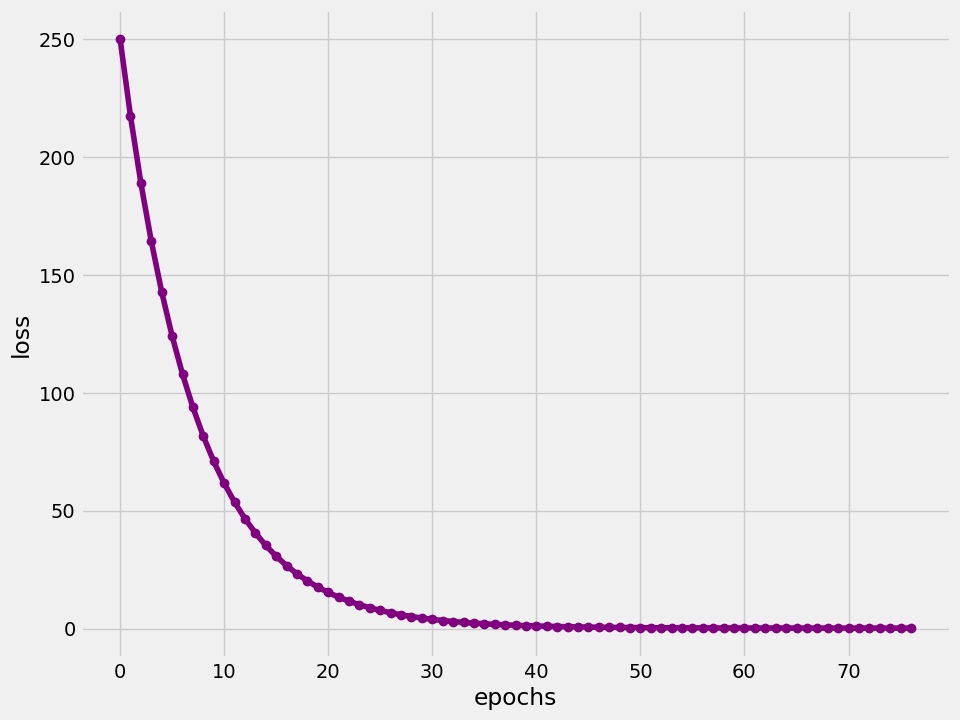

In [10]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,8))
plt.plot( np.arange(epoch),loss, marker="o" , color="purple")
plt.xlabel("epochs")
plt.ylabel("loss")

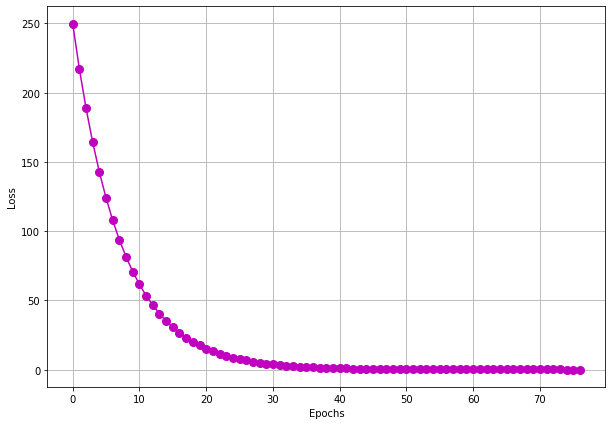

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

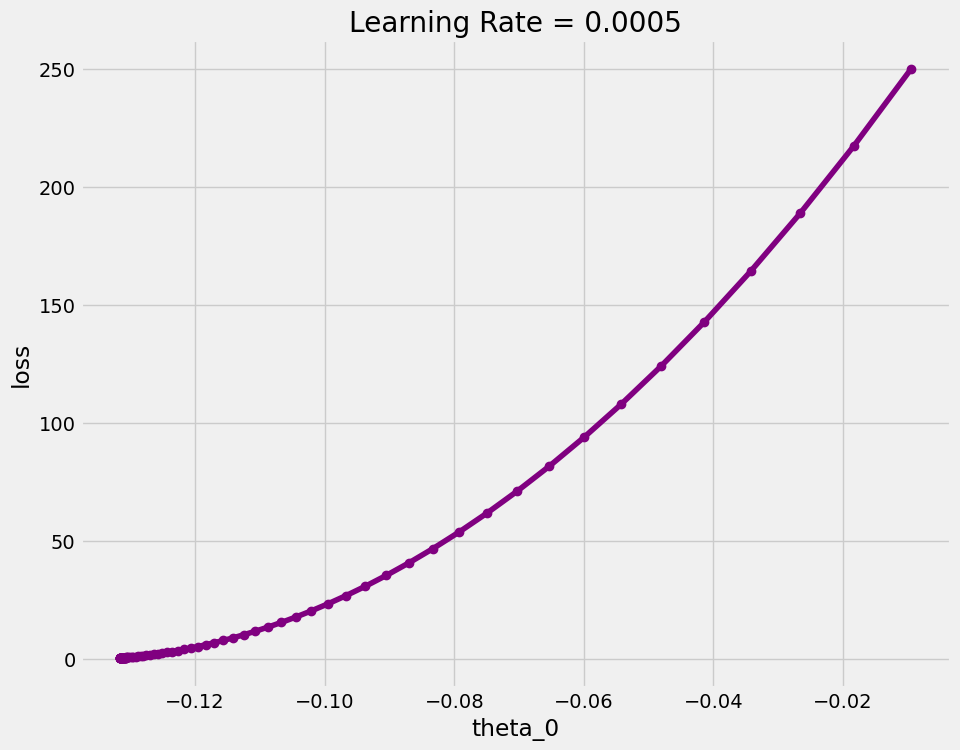

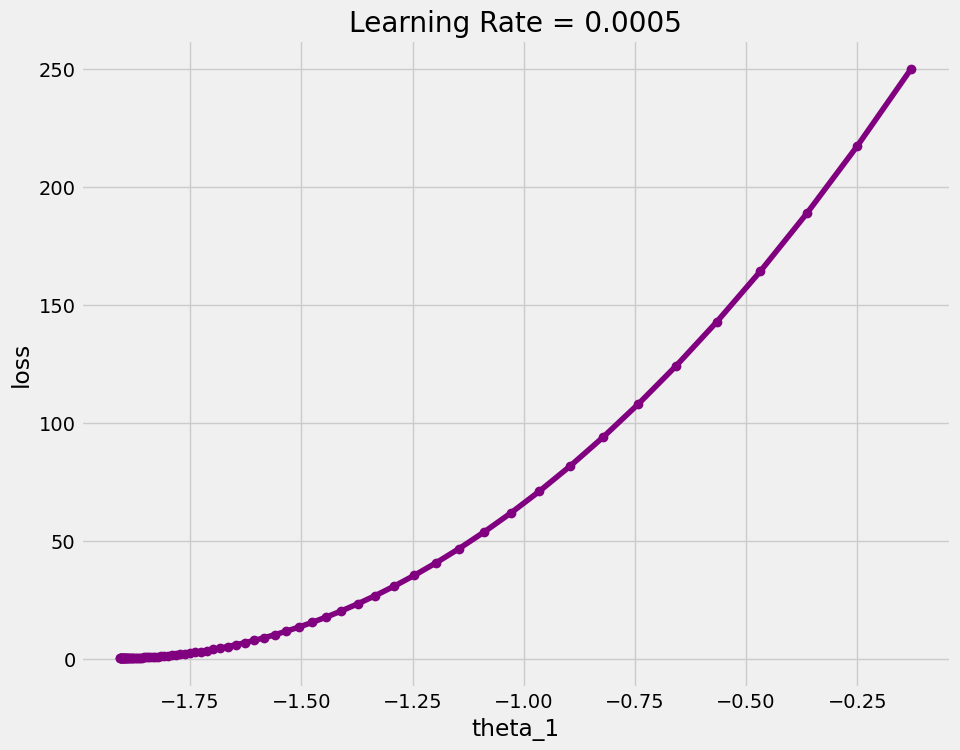

In [11]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,8))
plt.plot( theta_0,loss, marker="o" , color="purple")
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.title("Learning Rate = 0.0005")
plt.show()

plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,8))
plt.plot( theta_1,loss, marker="o" , color="purple")
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.title("Learning Rate = 0.0005")
plt.show()

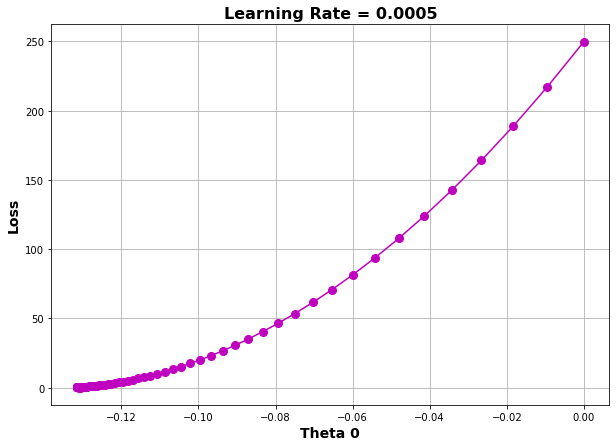

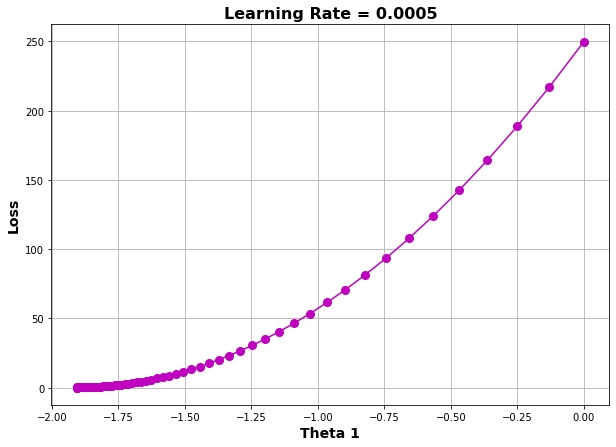

#### Plot all regression lines till converge

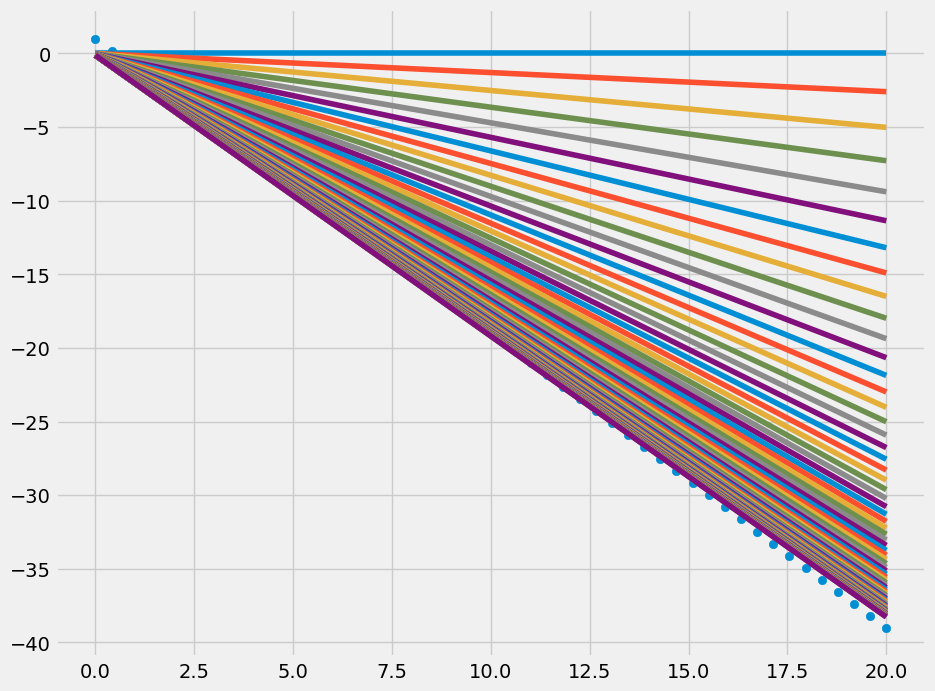

In [12]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,8))
plt.scatter( X,y, marker="o" )
for i in h_prdict:
    plt.plot( X,i,)
plt.show()

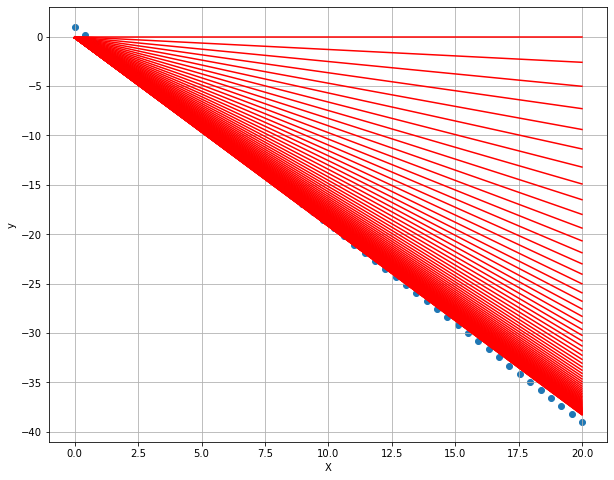

#### Plot the best regression line

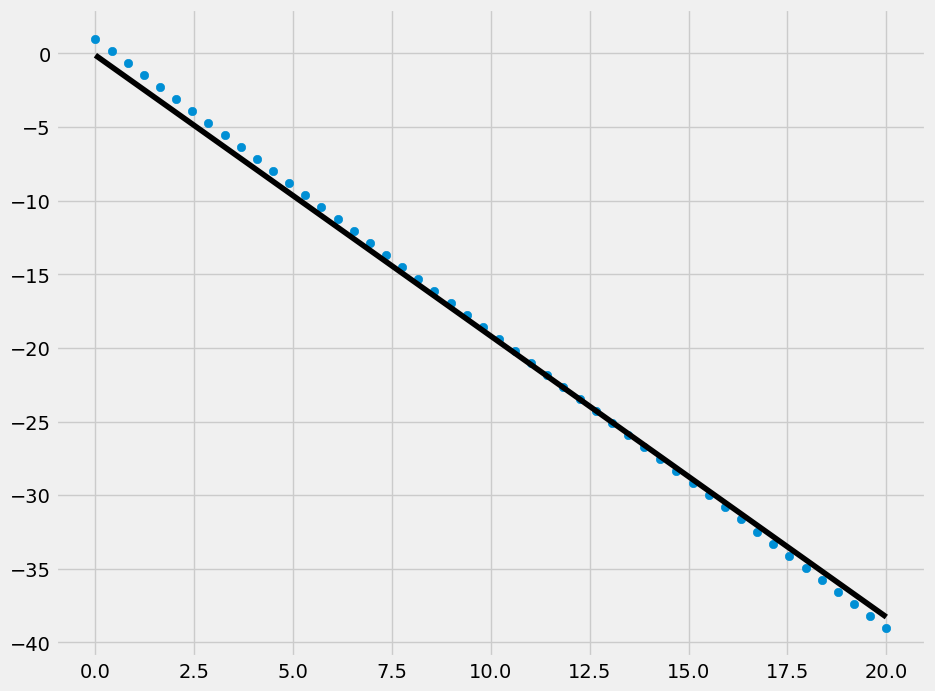

In [13]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,8))
plt.scatter( X,y, marker="o" )
plt.plot( X,h_prdict[-1], color="black")
plt.show()

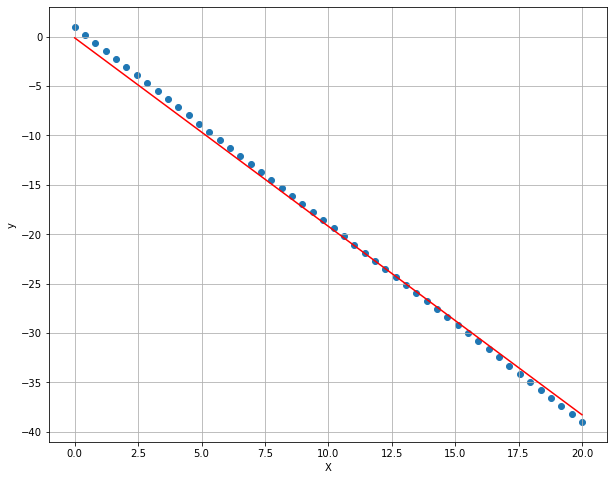

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [14]:
loss, y_predict, y, epoch, theta_0, theta_1, h_prdict =gredint(X, y,  0.00005, 1000)

---------------iteration----------- 0

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector: [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

Gradient Vector:
 [[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
 260.0826935743251

theta_0_new: -0.00095

theta_1_new: -0.01296938775510204

---------------iteration--

Gradient Vector Norm:
 35.76307869326893

theta_0_new: -0.11871326871508864

theta_1_new: -1.653802607779813

---------------iteration----------- 293

h(x): [ -0.11871327  -0.79373474  -1.46875621  -2.14377769  -2.81879916
  -3.49382063  -4.1688421   -4.84386358  -5.51888505  -6.19390652
  -6.86892799  -7.54394947  -8.21897094  -8.89399241  -9.56901388
 -10.24403536 -10.91905683 -11.5940783  -12.26909977 -12.94412125
 -13.61914272 -14.29416419 -14.96918567 -15.64420714 -16.31922861
 -16.99425008 -17.66927156 -18.34429303 -19.0193145  -19.69433597
 -20.36935745 -21.04437892 -21.71940039 -22.39442186 -23.06944334
 -23.74446481 -24.41948628 -25.09450775 -25.76952923 -26.4445507
 -27.11957217 -27.79459364 -28.46961512 -29.14463659 -29.81965806
 -30.49467953 -31.16970101 -31.84472248 -32.51974395 -33.19476542]

Error Vector: [-1.11871327 -0.97740821 -0.83610315 -0.69479809 -0.55349304 -0.41218798
 -0.27088292 -0.12957786  0.0117272   0.15303225  0.29433731  0.43564237
  0.57694743  0.718252

Gradient Vector Norm:
 10.529502096934717

theta_0_new: -0.12982062200034616

theta_1_new: -1.8385581761808079

---------------iteration----------- 473

h(x): [ -0.12982062  -0.88025253  -1.63068444  -2.38111635  -3.13154826
  -3.88198017  -4.63241207  -5.38284398  -6.13327589  -6.8837078
  -7.63413971  -8.38457162  -9.13500353  -9.88543543 -10.63586734
 -11.38629925 -12.13673116 -12.88716307 -13.63759498 -14.38802689
 -15.13845879 -15.8888907  -16.63932261 -17.38975452 -18.14018643
 -18.89061834 -19.64105025 -20.39148216 -21.14191406 -21.89234597
 -22.64277788 -23.39320979 -24.1436417  -24.89407361 -25.64450552
 -26.39493742 -27.14536933 -27.89580124 -28.64623315 -29.39666506
 -30.14709697 -30.89752888 -31.64796079 -32.39839269 -33.1488246
 -33.89925651 -34.64968842 -35.40012033 -36.15055224 -36.90098415]

Error Vector: [-1.12982062 -1.063926   -0.99803138 -0.93213676 -0.86624213 -0.80034751
 -0.73445289 -0.66855827 -0.60266365 -0.53676902 -0.4708744  -0.40497978
 -0.33908516 -0.27319

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.00095
theta_1_new : -0.0129693


Error Vector:
[-1.03616786 -0.42185497  0.19245793  0.80677082  1.42108371  2.0353966
  2.64970949  3.26402238  3.87833527  4.49264817  5.10696106  5.72127395
  6.33558684  6.94989973  7.56421262  8.17852551  8.79283841  9.4071513
 10.02146419 10.63577708 11.25008997 11.86440286 12.47871575 13.09302865
 13.70734154 14.32165443 14.93596732 15.55028021 16.1645931  16.77890599
 17.39321889 18.00753178 18.62184467 19.23615756 19.85047045 20.46478334
 21.07909623 21.69340913 22.30772202 22.92203491 23.5363478  24.15066069
 24.76497358 25.37928647 25.99359937 26.60791226 27.22222515 27.83653804
 28.45085093 29.06516382]

j = 137.49780357676352

Gradient Vector:
[[ 14.01449798]
 [192.36157561]]

Gradient Vector Norm:
192.8714129238948

theta_0_new : -0.03686858155519533
theta_1_new : -0.5045514947736295

****************** Iteration 45 ********************

h(x):
[ -0.03686858  -0.24280797  -0.44874735  -0.65468674  -0.86062612
  -1.06656551  -1.2725049   -1.47844428  -1.68438367  -1.8903230


j = 68.83712790496376

Gradient Vector:
[[  9.82460151]
 [136.03098233]]

Gradient Vector Norm:
136.3853032673908

theta_0_new : -0.06685086270355442
theta_1_new : -0.9177054348813832

****************** Iteration 96 ********************

h(x):
[ -0.06685086  -0.44142451  -0.81599816  -1.1905718   -1.56514545
  -1.9397191   -2.31429274  -2.68886639  -3.06344004  -3.43801368
  -3.81258733  -4.18716098  -4.56173463  -4.93630827  -5.31088192
  -5.68545557  -6.06002921  -6.43460286  -6.80917651  -7.18375015
  -7.5583238   -7.93289745  -8.30747109  -8.68204474  -9.05661839
  -9.43119203  -9.80576568 -10.18033933 -10.55491298 -10.92948662
 -11.30406027 -11.67863392 -12.05320756 -12.42778121 -12.80235486
 -13.1769285  -13.55150215 -13.9260758  -14.30064944 -14.67522309
 -15.04979674 -15.42437039 -15.79894403 -16.17351768 -16.54809133
 -16.92266497 -17.29723862 -17.67181227 -18.04638591 -18.42095956]

Error Vector:
[-1.06685086 -0.62509798 -0.1833451   0.25840779  0.70016067  1.14191356
  1.5


j = 31.81571190585062

Gradient Vector:
[[ 6.57608066]
 [92.35572627]]

Gradient Vector Norm:
92.58955130845696

theta_0_new : -0.08984261951516516
theta_1_new : -1.238058338321551

****************** Iteration 153 ********************

h(x):
[ -0.08984262  -0.59517255  -1.10050249  -1.60583242  -2.11116236
  -2.61649229  -3.12182222  -3.62715216  -4.13248209  -4.63781203
  -5.14314196  -5.64847189  -6.15380183  -6.65913176  -7.1644617
  -7.66979163  -8.17512156  -8.6804515   -9.18578143  -9.69111137
 -10.1964413  -10.70177123 -11.20710117 -11.7124311  -12.21776104
 -12.72309097 -13.2284209  -13.73375084 -14.23908077 -14.74441071
 -15.24974064 -15.75507057 -16.26040051 -16.76573044 -17.27106038
 -17.77639031 -18.28172024 -18.78705018 -19.29238011 -19.79771005
 -20.30303998 -20.80836991 -21.31369985 -21.81902978 -22.32435972
 -22.82968965 -23.33501958 -23.84034952 -24.34567945 -24.85100939]

Error Vector:
[-1.08984262 -0.77884602 -0.46784943 -0.15685283  0.15414377  0.46514036
  0.7761

h(x):
[ -0.10315948  -0.68542902  -1.26769856  -1.8499681   -2.43223764
  -3.01450718  -3.59677672  -4.17904625  -4.76131579  -5.34358533
  -5.92585487  -6.50812441  -7.09039395  -7.67266349  -8.25493303
  -8.83720257  -9.41947211 -10.00174165 -10.58401118 -11.16628072
 -11.74855026 -12.3308198  -12.91308934 -13.49535888 -14.07762842
 -14.65989796 -15.2421675  -15.82443704 -16.40670658 -16.98897611
 -17.57124565 -18.15351519 -18.73578473 -19.31805427 -19.90032381
 -20.48259335 -21.06486289 -21.64713243 -22.22940197 -22.81167151
 -23.39394104 -23.97621058 -24.55848012 -25.14074966 -25.7230192
 -26.30528874 -26.88755828 -27.46982782 -28.05209736 -28.6343669 ]

Error Vector:
[-1.10315948 -0.86910249 -0.6350455  -0.40098851 -0.16693152  0.06712548
  0.30118247  0.53523946  0.76929645  1.00335344  1.23741043  1.47146743
  1.70552442  1.93958141  2.1736384   2.40769539  2.64175238  2.87580937
  3.10986637  3.34392336  3.57798035  3.81203734  4.04609433  4.28015132
  4.51420832  4.74826531  4

Error Vector:
[-1.11337893 -0.93966527 -0.76595161 -0.59223795 -0.41852429 -0.24481063
 -0.07109696  0.1026167   0.27633036  0.45004402  0.62375768  0.79747134
  0.971185    1.14489866  1.31861232  1.49232598  1.66603965  1.83975331
  2.01346697  2.18718063  2.36089429  2.53460795  2.70832161  2.88203527
  3.05574893  3.22946259  3.40317626  3.57688992  3.75060358  3.92431724
  4.0980309   4.27174456  4.44545822  4.61917188  4.79288554  4.9665992
  5.14031287  5.31402653  5.48774019  5.66145385  5.83516751  6.00888117
  6.18259483  6.35630849  6.53002215  6.70373581  6.87744948  7.05116314
  7.2248768   7.39859046]

j = 8.08010689404443

Gradient Vector:
[[ 3.14260576]
 [46.19171882]]

Gradient Vector Norm:
46.29849737188856

theta_0_new : -0.11353606105419035
theta_1_new : -1.5767111164794902

****************** Iteration 255 ********************

h(x):
[ -0.11353606  -0.75709162  -1.40064718  -2.04420273  -2.68775829
  -3.33131385  -3.97486941  -4.61842497  -5.26198052  -5.90553608
 

theta_0_new : -0.12177000204725738
theta_1_new : -1.7006104572918064

****************** Iteration 322 ********************

h(x):
[ -0.12177     -0.81589672  -1.51002344  -2.20415015  -2.89827687
  -3.59240359  -4.28653031  -4.98065702  -5.67478374  -6.36891046
  -7.06303717  -7.75716389  -8.45129061  -9.14541733  -9.83954404
 -10.53367076 -11.22779748 -11.9219242  -12.61605091 -13.31017763
 -14.00430435 -14.69843106 -15.39255778 -16.0866845  -16.78081122
 -17.47493793 -18.16906465 -18.86319137 -19.55731809 -20.2514448
 -20.94557152 -21.63969824 -22.33382495 -23.02795167 -23.72207839
 -24.41620511 -25.11033182 -25.80445854 -26.49858526 -27.19271198
 -27.88683869 -28.58096541 -29.27509213 -29.96921884 -30.66334556
 -31.35747228 -32.051599   -32.74572571 -33.43985243 -34.13397915]

Error Vector:
[-1.12177    -0.99957019 -0.87737038 -0.75517056 -0.63297075 -0.51077094
 -0.38857112 -0.26637131 -0.1441715  -0.02197168  0.10022813  0.22242794
  0.34462776  0.46682757  0.58902738  0.7112272 


Error Vector:
[-1.12545257 -1.02723783 -0.92902308 -0.83080834 -0.7325936  -0.63437885
 -0.53616411 -0.43794937 -0.33973462 -0.24151988 -0.14330514 -0.04509039
  0.05312435  0.15133909  0.24955384  0.34776858  0.44598332  0.54419807
  0.64241281  0.74062755  0.8388423   0.93705704  1.03527178  1.13348653
  1.23170127  1.32991601  1.42813076  1.5263455   1.62456024  1.72277499
  1.82098973  1.91920447  2.01741922  2.11563396  2.2138487   2.31206345
  2.41027819  2.50849293  2.60670768  2.70492242  2.80313716  2.90135191
  2.99956665  3.09778139  3.19599614  3.29421088  3.39242562  3.49064037
  3.58885511  3.68706985]

j = 1.8246392779177878

Gradient Vector:
[[ 1.28080864]
 [21.15633959]]

Gradient Vector Norm:
21.195074327352817

theta_0_new : -0.1255166095763225
theta_1_new : -1.7604316959298962

****************** Iteration 370 ********************

h(x):
[ -0.12551661  -0.84406016  -1.56260371  -2.28114726  -2.99969081
  -3.71823436  -4.43677791  -5.15532146  -5.873865    -6.592408

theta_0_new : -0.12838891843775904
theta_1_new : -1.81026389922397

****************** Iteration 427 ********************

h(x):
[ -0.12838892  -0.86727214  -1.60615537  -2.34503859  -3.08392182
  -3.82280504  -4.56168826  -5.30057149  -6.03945471  -6.77833794
  -7.51722116  -8.25610438  -8.99498761  -9.73387083 -10.47275406
 -11.21163728 -11.95052051 -12.68940373 -13.42828695 -14.16717018
 -14.9060534  -15.64493663 -16.38381985 -17.12270307 -17.8615863
 -18.60046952 -19.33935275 -20.07823597 -20.8171192  -21.55600242
 -22.29488564 -23.03376887 -23.77265209 -24.51153532 -25.25041854
 -25.98930176 -26.72818499 -27.46706821 -28.20595144 -28.94483466
 -29.68371789 -30.42260111 -31.16148433 -31.90036756 -32.63925078
 -33.37813401 -34.11701723 -34.85590045 -35.59478368 -36.3336669 ]

Error Vector:
[-1.12838892 -1.05094561 -0.97350231 -0.896059   -0.81861569 -0.74117239
 -0.66372908 -0.58628577 -0.50884247 -0.43139916 -0.35395585 -0.27651255
 -0.19906924 -0.12162593 -0.04418263  0.03326068  


Gradient Vector Norm:
9.705665950069054

theta_0_new : -0.13009444831874967
theta_1_new : -1.8445985880847027

****************** Iteration 485 ********************

h(x):
[ -0.13009445  -0.88299183  -1.63588921  -2.3887866   -3.14168398
  -3.89458136  -4.64747875  -5.40037613  -6.15327351  -6.90617089
  -7.65906828  -8.41196566  -9.16486304  -9.91776043 -10.67065781
 -11.42355519 -12.17645257 -12.92934996 -13.68224734 -14.43514472
 -15.18804211 -15.94093949 -16.69383687 -17.44673425 -18.19963164
 -18.95252902 -19.7054264  -20.45832379 -21.21122117 -21.96411855
 -22.71701594 -23.46991332 -24.2228107  -24.97570808 -25.72860547
 -26.48150285 -27.23440023 -27.98729762 -28.740195   -29.49309238
 -30.24598976 -30.99888715 -31.75178453 -32.50468191 -33.2575793
 -34.01047668 -34.76337406 -35.51627144 -36.26916883 -37.02206621]

Error Vector:
[-1.13009445 -1.0666653  -1.00323615 -0.93980701 -0.87637786 -0.81294871
 -0.74951956 -0.68609041 -0.62266127 -0.55923212 -0.49580297 -0.43237382
 -0.36


Error Vector:
[-1.13097983e+00 -1.07714118e+00 -1.02330254e+00 -9.69463898e-01
 -9.15625255e-01 -8.61786611e-01 -8.07947968e-01 -7.54109325e-01
 -7.00270682e-01 -6.46432038e-01 -5.92593395e-01 -5.38754752e-01
 -4.84916109e-01 -4.31077465e-01 -3.77238822e-01 -3.23400179e-01
 -2.69561536e-01 -2.15722892e-01 -1.61884249e-01 -1.08045606e-01
 -5.42069626e-02 -3.68319395e-04  5.34703239e-02  1.07308967e-01
  1.61147610e-01  2.14986254e-01  2.68824897e-01  3.22663540e-01
  3.76502183e-01  4.30340827e-01  4.84179470e-01  5.38018113e-01
  5.91856756e-01  6.45695400e-01  6.99534043e-01  7.53372686e-01
  8.07211329e-01  8.61049973e-01  9.14888616e-01  9.68727259e-01
  1.02256590e+00  1.07640455e+00  1.13024319e+00  1.18408183e+00
  1.23792048e+00  1.29175912e+00  1.34559776e+00  1.39943641e+00
  1.45327505e+00  1.50711369e+00]

j = 0.31950125912269717

Gradient Vector:
[[0.18806693]
 [6.456954  ]]

Gradient Vector Norm:
6.459692258812109

theta_0_new : -0.1309892309985654
theta_1_new : -1.868418

In [15]:
from sklearn.metrics import r2_score
r2_score(y,y_predict)

0.9965933726454433

Text(0, 0.5, 'loss')

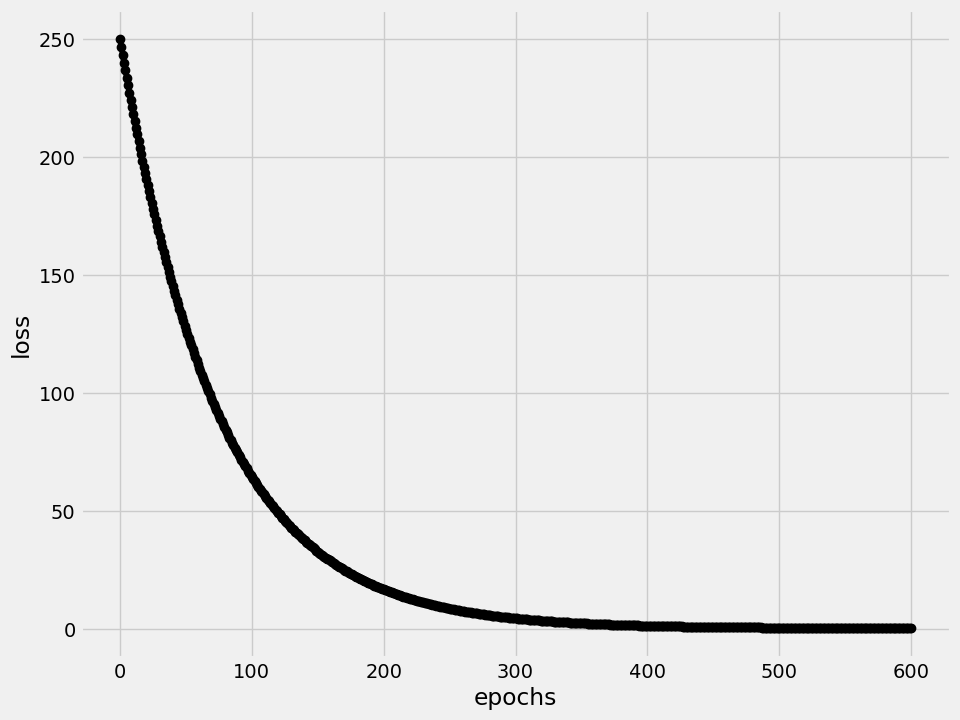

In [16]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,8))
plt.plot( np.arange(epoch),loss, marker="o" , color="black")
plt.xlabel("epochs")
plt.ylabel("loss")

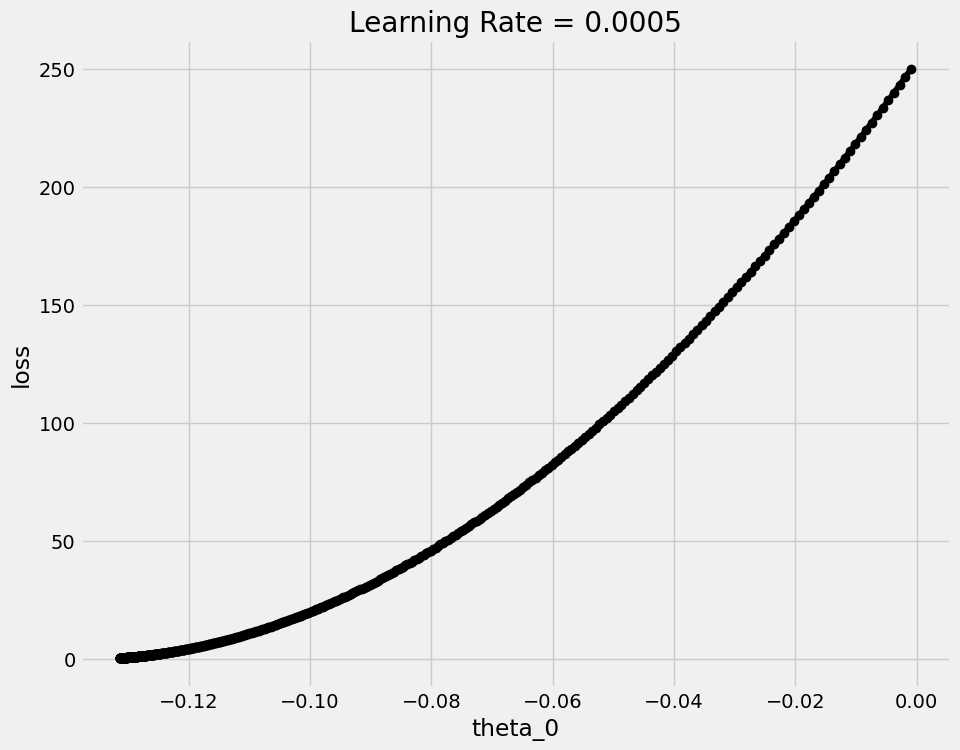

In [17]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,8))
plt.plot( theta_0,loss, marker="o" , color="black")
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.title("Learning Rate = 0.0005")
plt.show()

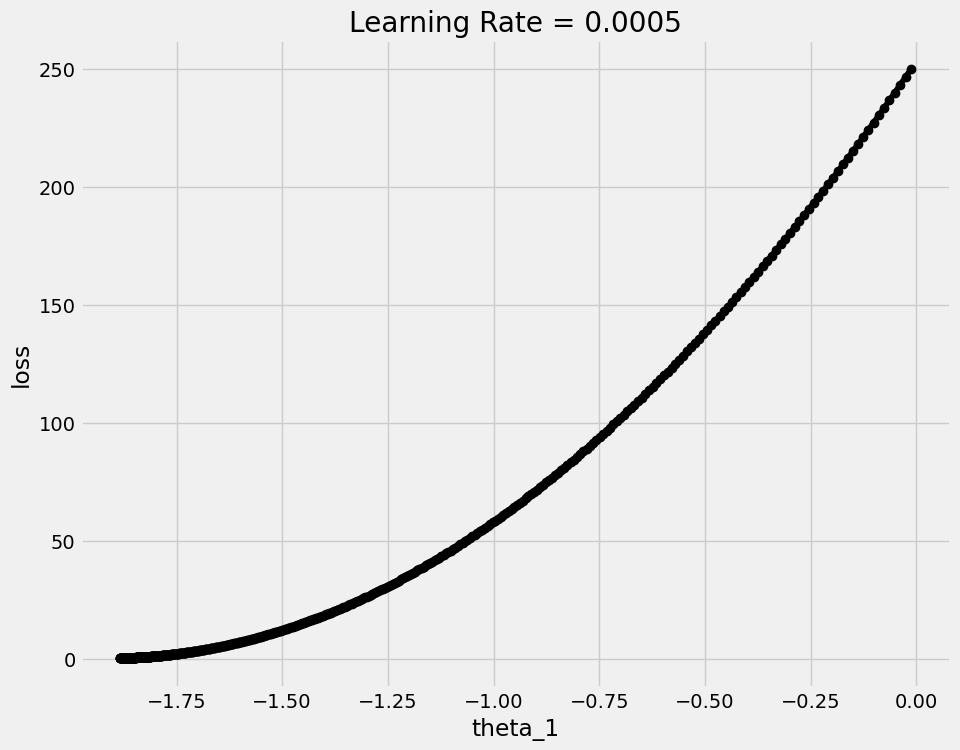

In [18]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,8))
plt.plot( theta_1,loss, marker="o" , color="black")
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.title("Learning Rate = 0.0005")
plt.show()

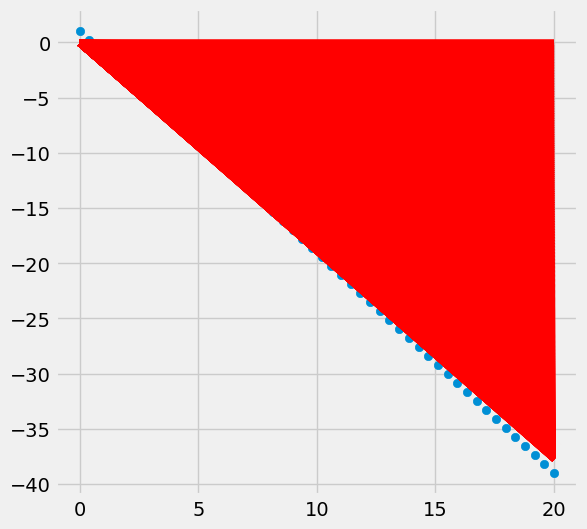

In [19]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6,6))
plt.scatter( X,y, marker="o" )
for i in h_prdict:
    plt.plot( X,i, color="red")
plt.show()

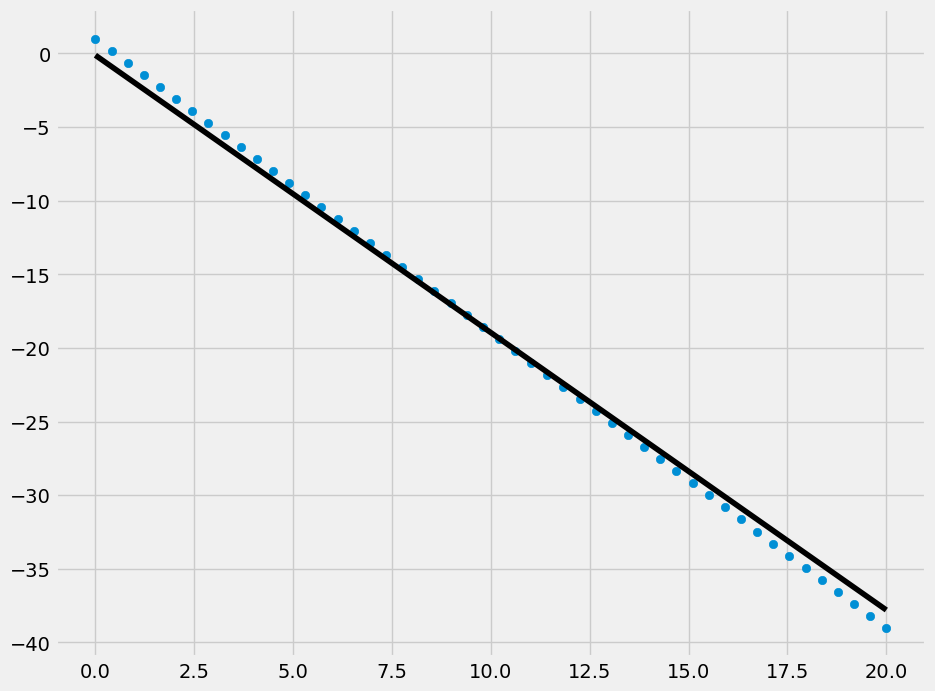

In [20]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,8))
plt.scatter( X,y, marker="o" )
plt.plot( X,h_prdict[-1], color="black")
plt.show()

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [21]:
loss, y_predict, y, epoch, theta_0, theta_1, h_prdict =gredint(X, y,  0.005, 300)

---------------iteration----------- 0

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector: [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

Gradient Vector:
 [[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
 260.0826935743251

theta_0_new: -0.095

theta_1_new: -1.296938775510204

---------------iteration------

In [22]:
from sklearn.metrics import r2_score
r2_score(y,y_predict)

0.9976265938305019

r2_score: 0.9976200723230484


Text(0, 0.5, 'loss')

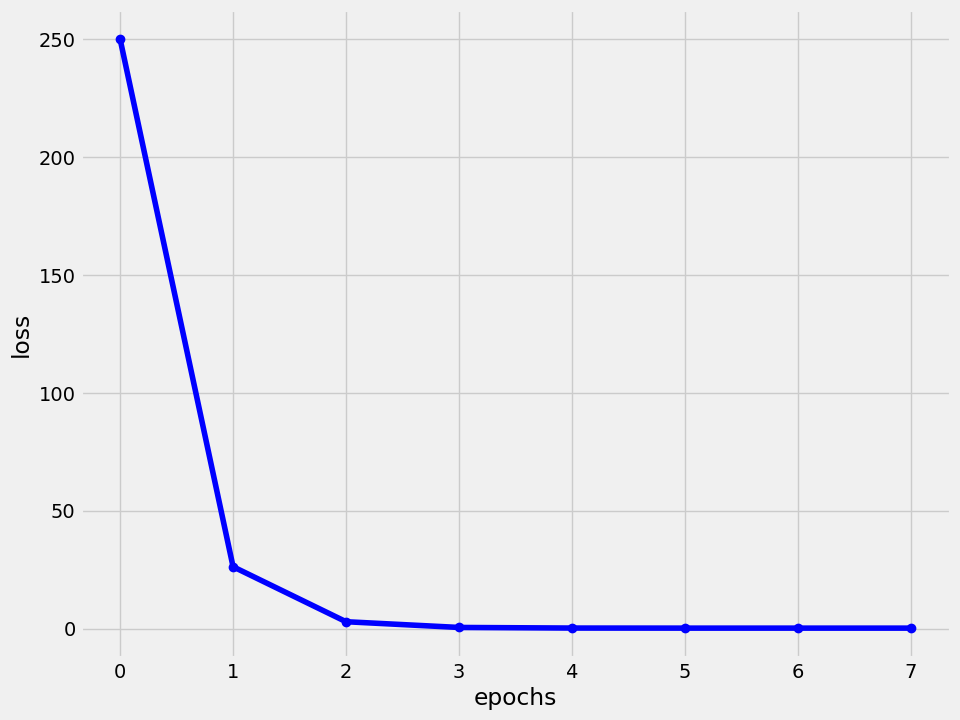

In [23]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,8))
plt.plot( np.arange(epoch),loss, marker="o" , color="blue")
plt.xlabel("epochs")
plt.ylabel("loss")

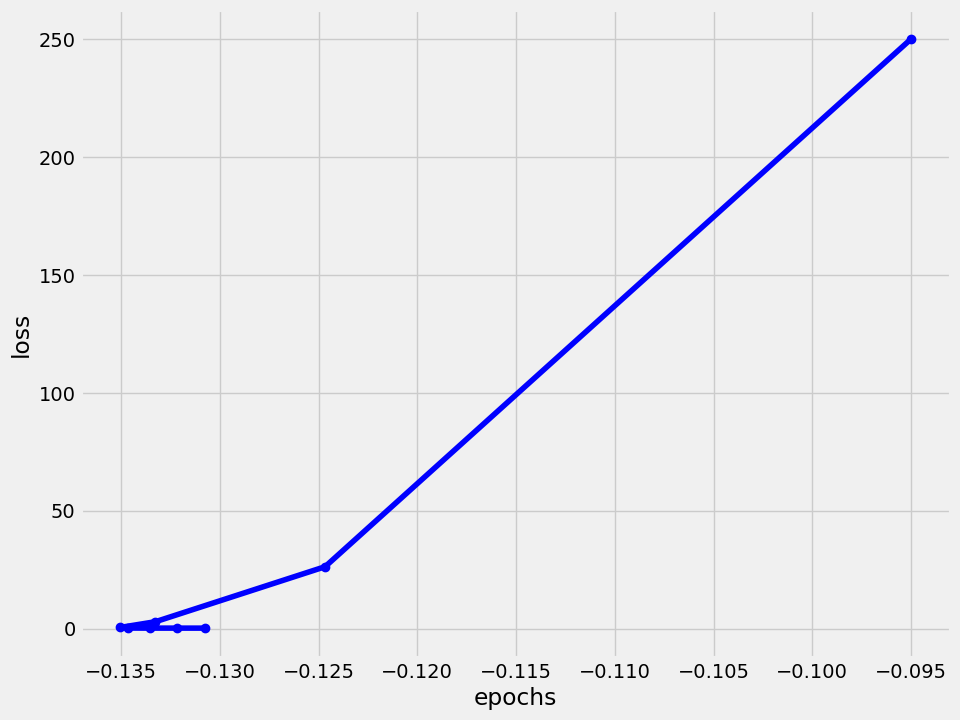

In [24]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,8))
plt.plot( theta_0,loss, marker="o" , color="blue")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

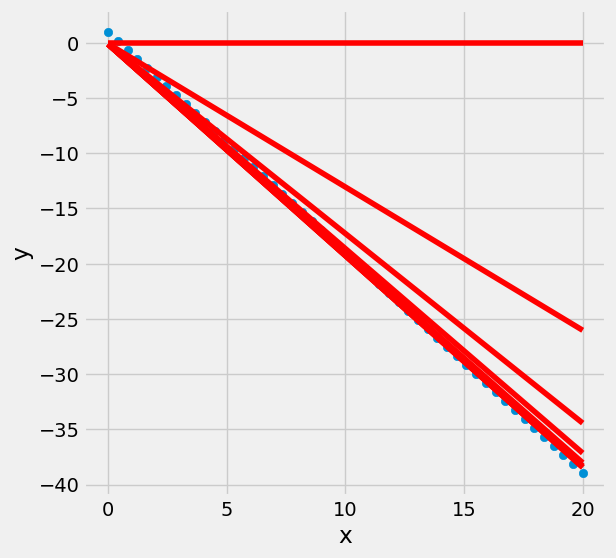

In [25]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6,6))
plt.scatter( X,y, marker="o" )
for i in h_prdict:
    plt.plot( X,i, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

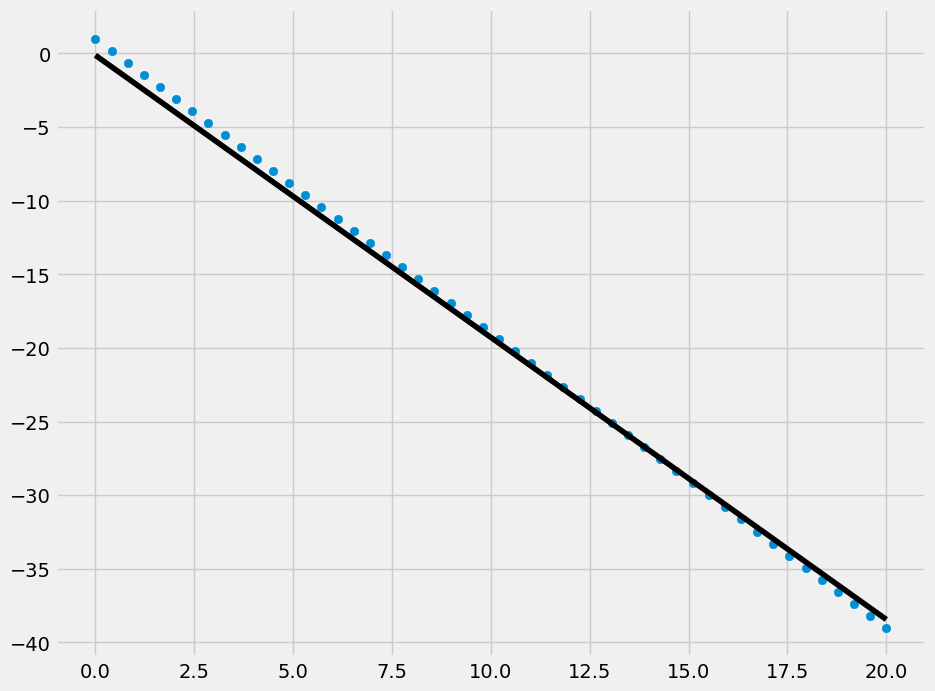

In [26]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,8))
plt.scatter( X,y, marker="o" )
plt.plot( X,h_prdict[-1], color="black")
plt.show()

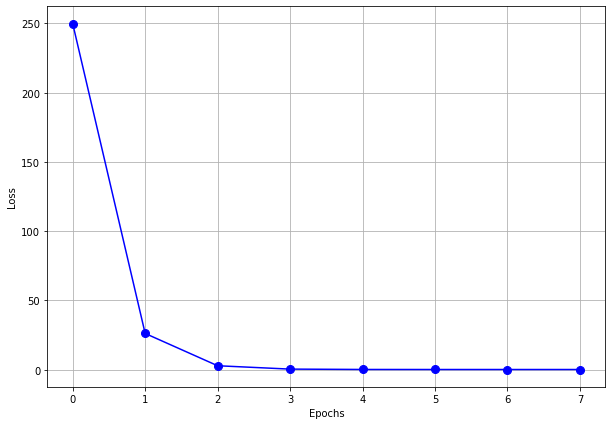

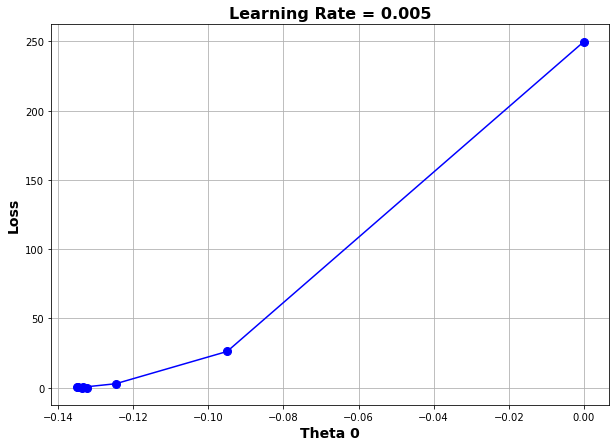

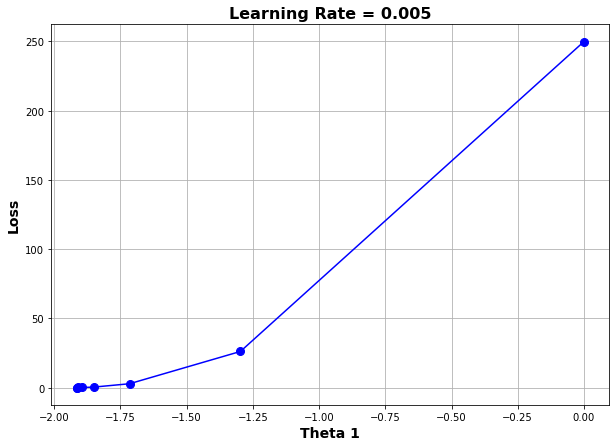

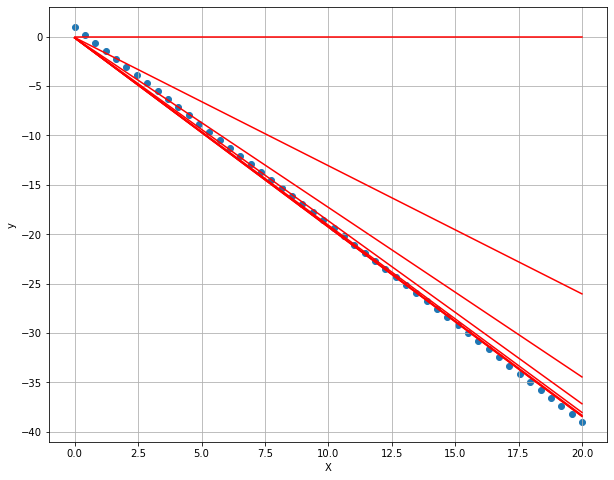

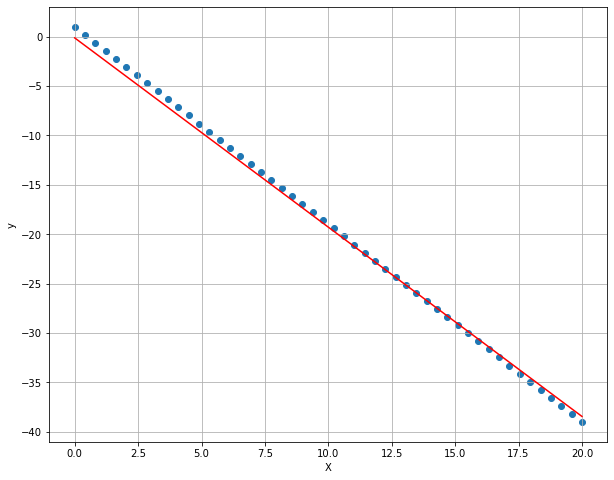

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


In [27]:
def Stochastic_GD(X ,y , rate ,max_it):
    D= np.concatenate((X.reshape(-1,1),y.reshape(-1,1)),axis=1)
    np.random.shuffle(D)
    X = D[:,0]
    y = D[:,1]  
    m = len(X)
    theta_0 , theta_1 = 0,0
    loss=[]
    Theta_0=[]
    Theta_1=[]
    h_prdict=[]
    ch=0
    
    epoch = max_it
    for e in range(0,epoch):
        for i in range(0,m):
            Theta_0.append(theta_0)
            Theta_1.append(theta_1)
            
            h_x = theta_0 + theta_1 * X[i]

            
            err= (h_x - y[i])
            j = (1/2) * (err**2)
            loss.append(j)
            
            d_theta_0= err
            d_theta_1= err * X[i]
            
            G_V= np.array([[d_theta_0],
                           [d_theta_1]])
            
            G_norm = np.linalg.norm(G_V)
            
            theta_0 = theta_0 - rate * d_theta_0 
            theta_1 = theta_1 - rate * d_theta_1 
            
        print(f"\n******* Epoch {e} *******")
        print("\ncost :\n",j)
        print("\nGradient Vector :\n",G_V)
        print("\nGradient Vector Norm :\n",G_norm)
        print("\ntheta_0_new : ",theta_0)
        print("theta_1_new : ",theta_1)   
        
        if e>0 and abs(loss[e*m] - loss[(e-1)*m]) <= 0.001:
            break
    
        if G_norm <= 0.001:
            break
             
# ****** Training Report ********
    print("\n******* Training Report *******")
    print(f"\nGradient Descent converged after {i+1} iterations {e} Epochs")
    
    print("\ntheta_0_Opt : " ,theta_0)
    print("theta_1_Opt : " ,theta_1)
    print("\ncost : ",j)
    print()    
    
    
    return Theta_0, Theta_1 , loss,h_prdict

##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [28]:
#loss, y_predict, y, epoch, theta_0, theta_1, h_prdict = gredint(X,y,0.0005, 300)
Theta_0, Theta_1 , loss,h_prdict = Stochastic_GD (  X , y, 0.0005 ,300 )


******* Epoch 0 *******

cost :
 1.3549613075492102

Gradient Vector :
 [[ 1.64618426]
 [29.56412547]]

Gradient Vector Norm :
 29.60992126729945

theta_0_new :  -0.11828158557334163
theta_1_new :  -1.8608974094654418

******* Epoch 1 *******

cost :
 0.16118522240962505

Gradient Vector :
 [[ 0.56777676]
 [10.19680705]]

Gradient Vector Norm :
 10.212602236566921

theta_0_new :  -0.11448937413527169
theta_1_new :  -1.911442574145893

******* Epoch 2 *******

cost :
 0.14335746408063008

Gradient Vector :
 [[0.53545768]
 [9.61638284]]

Gradient Vector Norm :
 9.631278934126735

theta_0_new :  -0.1074617083472409
theta_1_new :  -1.9133423603239827

******* Epoch 3 *******

cost :
 0.14112233670950974

Gradient Vector :
 [[0.53126705]
 [9.54112245]]

Gradient Vector Norm :
 9.555901956695877

theta_0_new :  -0.10039134129059471
theta_1_new :  -1.9139316465637588

******* Epoch 4 *******

cost :
 0.13931460756965283

Gradient Vector :
 [[0.5278534 ]
 [9.47981622]]

Gradient Vector Norm :

In [29]:
hx=theta_0[-1] + theta_1[-1]*X
hx

array([ -0.13077619,  -0.9126788 ,  -1.69458141,  -2.47648403,
        -3.25838664,  -4.04028925,  -4.82219186,  -5.60409448,
        -6.38599709,  -7.1678997 ,  -7.94980231,  -8.73170492,
        -9.51360754, -10.29551015, -11.07741276, -11.85931537,
       -12.64121799, -13.4231206 , -14.20502321, -14.98692582,
       -15.76882844, -16.55073105, -17.33263366, -18.11453627,
       -18.89643889, -19.6783415 , -20.46024411, -21.24214672,
       -22.02404934, -22.80595195, -23.58785456, -24.36975717,
       -25.15165979, -25.9335624 , -26.71546501, -27.49736762,
       -28.27927024, -29.06117285, -29.84307546, -30.62497807,
       -31.40688069, -32.1887833 , -32.97068591, -33.75258852,
       -34.53449114, -35.31639375, -36.09829636, -36.88019897,
       -37.66210159, -38.4440042 ])

In [30]:
from sklearn.metrics import r2_score
r2_score(y,hx)

0.9976265938305019

r2_score: 0.9976768960178554


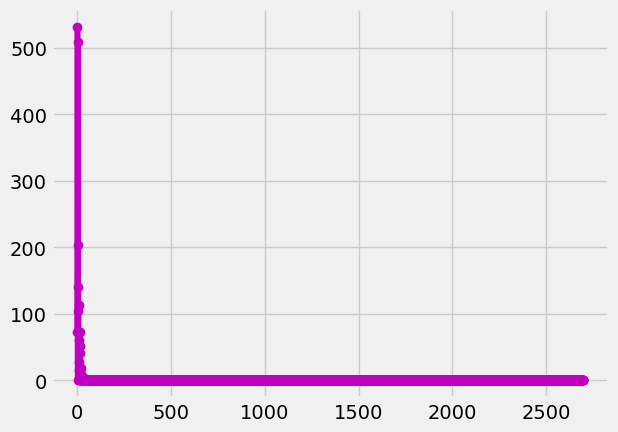

C:\Users\2ha M2li322\AppData\Local\Temp\ipykernel_6172\2907263566.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mo" (-> color='m'). The keyword argument will take precedence.
  plt.plot( Theta_0,loss,'-mo',color='blue')


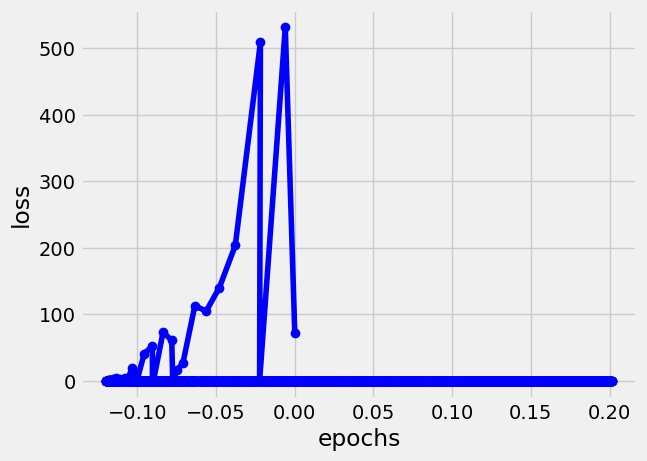

C:\Users\2ha M2li322\AppData\Local\Temp\ipykernel_6172\2907263566.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mo" (-> color='m'). The keyword argument will take precedence.
  plt.plot( Theta_1,loss,'-mo',color='blue')


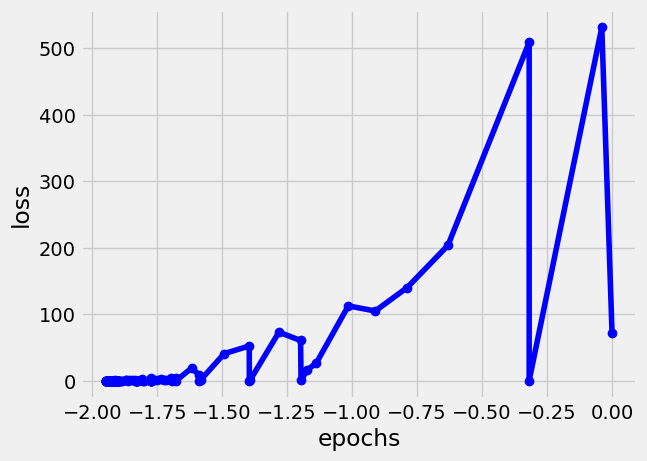

In [31]:
plt.plot(loss,'-mo')
plt.show()

plt.plot( Theta_0,loss,'-mo',color='blue')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

plt.plot( Theta_1,loss,'-mo',color='blue')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()


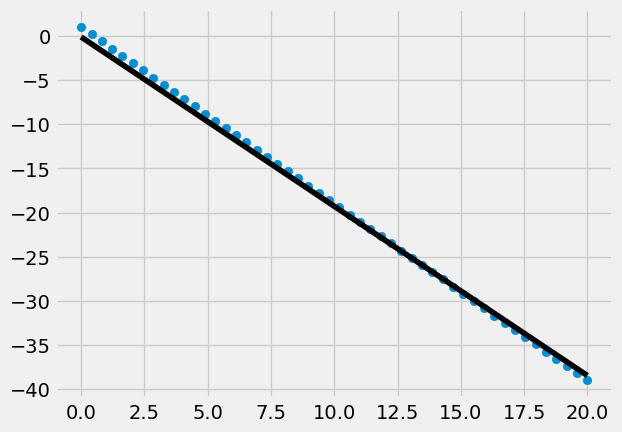

In [252]:
plt.scatter( X,y, marker="o" )
plt.plot( X,hx, color="black")
plt.show()

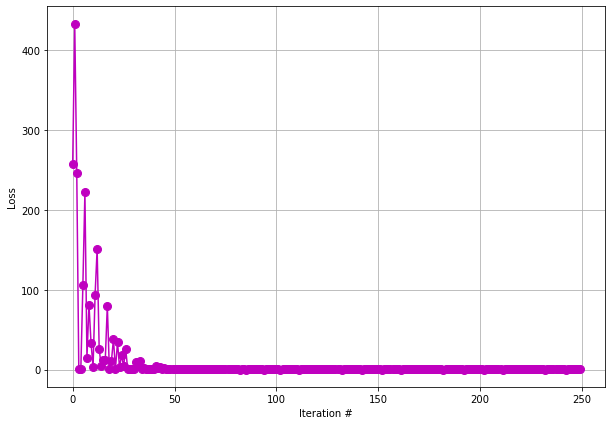

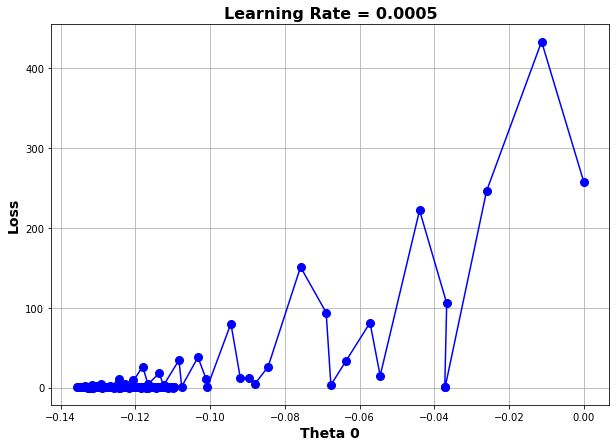

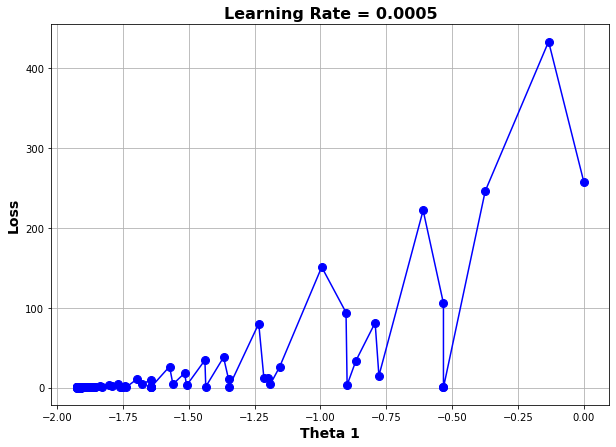

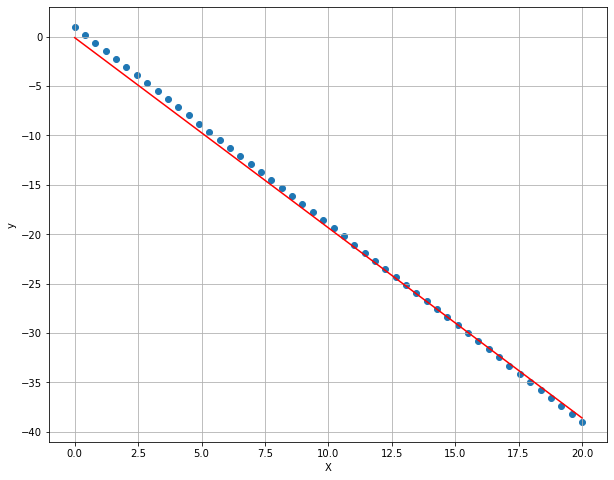

In [31]:
plot_loss_3(loss_St,'-mo')
plot_theta_loss(all_theta_0_St,'Theta 0',loss_St,'Learning Rate = 0.0005','-bo')
plot_theta_loss(all_theta_1_St,'Theta 1',loss_St,'Learning Rate = 0.0005','-bo')
plot_best_fit(opt_theta_0_St,opt_theta_1_St)

In [32]:
Stochastic_GD (  X , y, 0.0001 ,300 )


******* Epoch 0 *******

cost :
 14.443453815244618

Gradient Vector :
 [[ 5.37465419]
 [32.90604604]]

Gradient Vector Norm :
 33.34208712467752

theta_0_new :  -0.06972166037710148
theta_1_new :  -0.9507970022078689

******* Epoch 1 *******

cost :
 2.870413387304091

Gradient Vector :
 [[ 2.39600225]
 [14.66940152]]

Gradient Vector Norm :
 14.863787127232065

theta_0_new :  -0.10411804377834498
theta_1_new :  -1.429819760457164

******* Epoch 2 *******

cost :
 0.4013090770920603

Gradient Vector :
 [[0.89588959]
 [5.48503829]]

Gradient Vector Norm :
 5.557721048292348

theta_0_new :  -0.12072005527134741
theta_1_new :  -1.6711835615980075

******* Epoch 3 *******

cost :
 0.00988400645079205

Gradient Vector :
 [[0.14059877]
 [0.86080877]]

Gradient Vector Norm :
 0.8722154264594267

theta_0_new :  -0.12835898418780245
theta_1_new :  -1.7928252781836762

******* Epoch 4 *******

cost :
 0.028676399223679632

Gradient Vector :
 [[-0.23948444]
 [-1.46623128]]

Gradient Vector Norm

([0,
  -0.000716326530612245,
  -0.002328034513595526,
  -0.0027134984232188414,
  -0.003907801822855834,
  -0.006869928838751404,
  -0.007871284621983042,
  -0.00871230295890294,
  -0.012213951866432976,
  -0.014079167041806194,
  -0.016147662448069876,
  -0.016562821954769588,
  -0.019781107319019026,
  -0.02317595405119417,
  -0.02444548583277682,
  -0.026183616915854153,
  -0.02628316145800979,
  -0.026517446439172053,
  -0.02883986787293698,
  -0.029000864971541574,
  -0.031206548878786444,
  -0.03369036540841435,
  -0.03516245241157733,
  -0.03562058231354564,
  -0.03751178622663002,
  -0.03967717898854539,
  -0.041253027736989405,
  -0.0429859114525872,
  -0.043990517557852916,
  -0.04388611850609713,
  -0.0457552739126023,
  -0.04736029834677439,
  -0.04961531078812537,
  -0.05185843461099201,
  -0.05291924290690543,
  -0.05339267124084659,
  -0.05423276709711091,
  -0.05501597206586125,
  -0.05610763045253268,
  -0.05842873023766427,
  -0.06036529013667249,
  -0.06030774554463

##### The following results uses alpha = 0.0001 and max. iterations = 300.

****************** Epoch 0 ********************

Cost = 16.887127834434082

Gradient Vector:
[[ 5.81156224]
 [37.95305953]]

Gradient Vector Norm:
38.39542919503344

theta_0_new : -0.06824518438278841
theta_1_new : -0.9465294881483106

****************** Epoch 1 ********************

Cost = 3.4768759637568025

Gradient Vector:
[[ 2.63699676]
 [17.22120335]]

Gradient Vector Norm:
17.421928616911465

theta_0_new : -0.10250915532081234
theta_1_new : -1.4273881562733521

****************** Epoch 2 ********************

Cost = 0.5388930377939929

Gradient Vector:
[[1.03816476]
 [6.77985151]]

Gradient Vector Norm:
6.858875464652135

theta_0_new : -0.11904557794809867
theta_1_new : -1.6696771665089043

****************** Epoch 3 ********************

Cost = 0.027171708479479032

Gradient Vector:
[[0.23311675]
 [1.52239507]]

Gradient Vector Norm:
1.5401396595959387

theta_0_new : -0.1266525793929906
theta_1_new : -1.791785322149918

****************** Epoch 4 ********************

Cost = 0.

In [33]:
hx=theta_0[-1] + theta_1[-1]*X
from sklearn.metrics import r2_score
r2_score(y,hx)

0.9976265938305019

r2_score =  0.9976210193556192


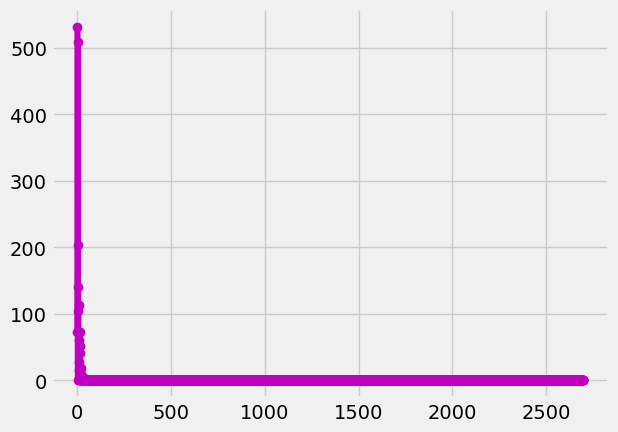

C:\Users\2ha M2li322\AppData\Local\Temp\ipykernel_6172\2907263566.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mo" (-> color='m'). The keyword argument will take precedence.
  plt.plot( Theta_0,loss,'-mo',color='blue')


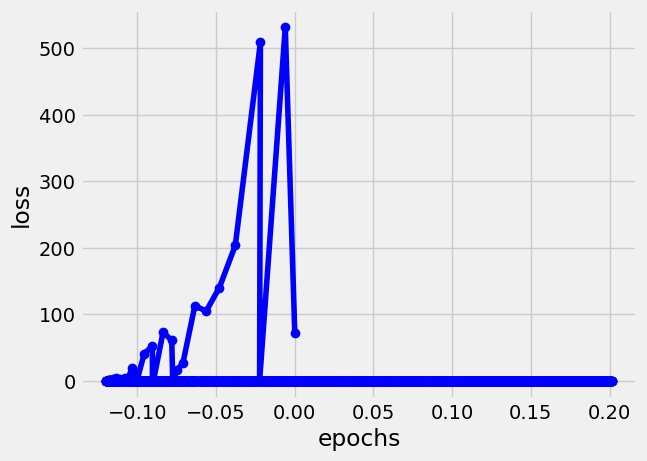

C:\Users\2ha M2li322\AppData\Local\Temp\ipykernel_6172\2907263566.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mo" (-> color='m'). The keyword argument will take precedence.
  plt.plot( Theta_1,loss,'-mo',color='blue')


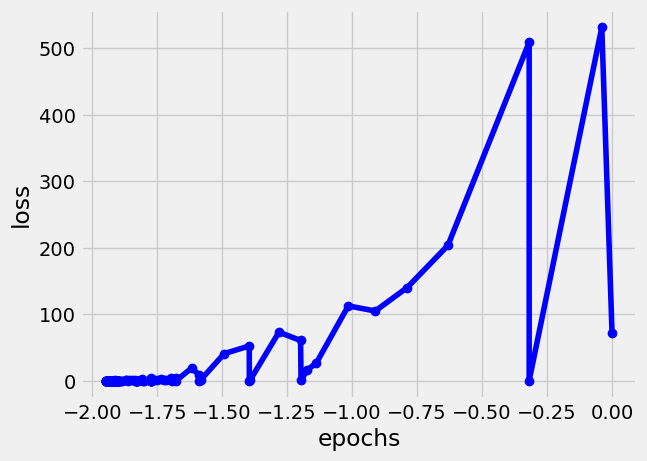

In [34]:
plt.plot(loss,'-mo')
plt.show()

plt.plot( Theta_0,loss,'-mo',color='blue')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

plt.plot( Theta_1,loss,'-mo',color='blue')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()


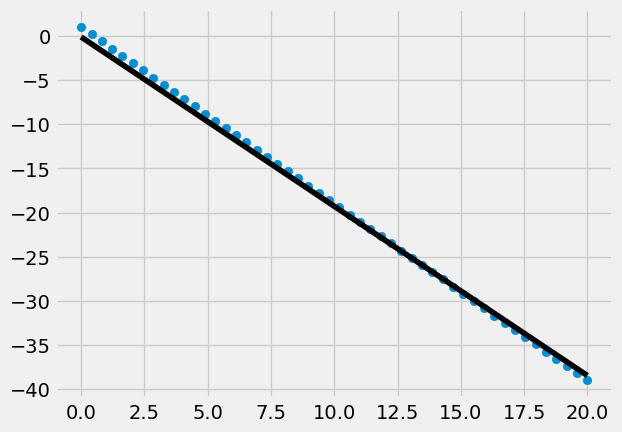

In [256]:
plt.scatter( X,y, marker="o" )
plt.plot( X,hx, color="black")
plt.show()

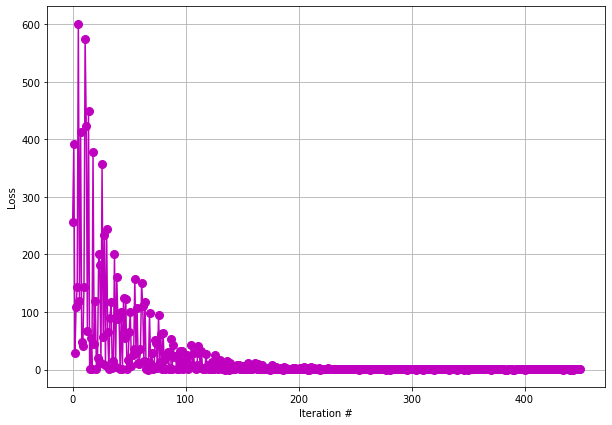

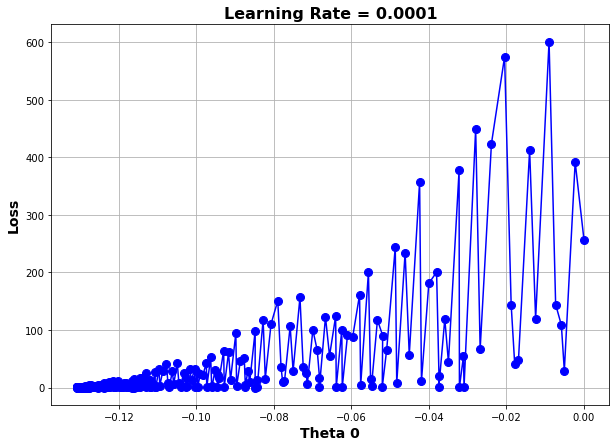

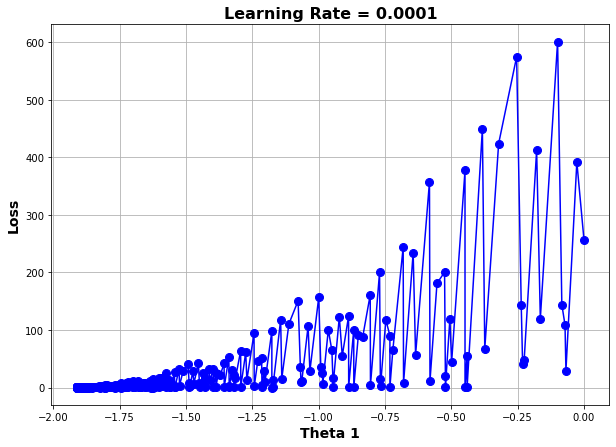

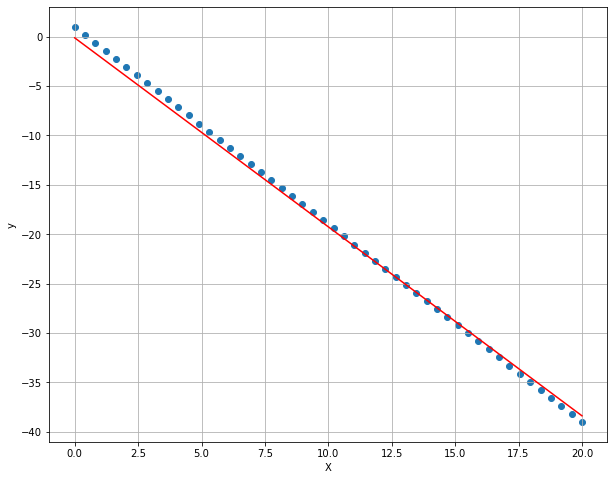

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [35]:
Stochastic_GD (  X , y, 0.00007 ,300 )


******* Epoch 0 *******

cost :
 10.876061543789719

Gradient Vector :
 [[ 4.66391714]
 [20.94003614]]

Gradient Vector Norm :
 21.453140482374277

theta_0_new :  -0.05336134787190517
theta_1_new :  -0.7281446722405984

******* Epoch 1 *******

cost :
 3.383583886779874

Gradient Vector :
 [[ 2.60137805]
 [11.67965656]]

Gradient Vector Norm :
 11.965849122248429

theta_0_new :  -0.08605220046486321
theta_1_new :  -1.1795668501277368

******* Epoch 2 *******

cost :
 0.8751954134019893

Gradient Vector :
 [[1.32302337]
 [5.94010491]]

Gradient Vector Norm :
 6.085658316735369

theta_0_new :  -0.10592929207011798
theta_1_new :  -1.4594424333799674

******* Epoch 3 *******

cost :
 0.1408754840492941

Gradient Vector :
 [[0.53080219]
 [2.38319352]]

Gradient Vector Norm :
 2.441590121216803

theta_0_new :  -0.11786319067813275
theta_1_new :  -1.6329723546875716

******* Epoch 4 *******

cost :
 0.0007978418599968285

Gradient Vector :
 [[0.03994601]
 [0.17934943]]

Gradient Vector Norm 

([0,
  -0.0021014285714285714,
  -0.0047856504510204075,
  -0.005754193099821531,
  -0.006228421971827399,
  -0.00735495896595171,
  -0.007771513668251607,
  -0.008458021325469849,
  -0.009088948730877325,
  -0.010957538368549234,
  -0.012213843949178146,
  -0.013724488014621962,
  -0.01584542872986849,
  -0.01684845487434721,
  -0.01881342196692164,
  -0.02069160034339863,
  -0.021799340190895647,
  -0.02304603000372361,
  -0.023797731243116068,
  -0.023967471587539806,
  -0.023895793864528676,
  -0.02546534670964131,
  -0.025488862154841457,
  -0.02756125869162783,
  -0.02804806027834942,
  -0.028348039173318934,
  -0.028415449198665045,
  -0.029040396682138855,
  -0.029292835676182877,
  -0.03065709299192825,
  -0.03150173318024629,
  -0.032935724243197566,
  -0.03390049913839433,
  -0.03512824478152368,
  -0.03585528216150323,
  -0.035959827691846344,
  -0.0377904463542673,
  -0.03979816880186909,
  -0.041287417076584135,
  -0.04304380706952695,
  -0.04488243957252772,
  -0.0459199

****************** Epoch 0 ********************

Cost = 124.0437076336173

Gradient Vector:
[[ 15.75079094]
 [205.72461637]]

Gradient Vector Norm:
206.32669530819234

theta_0_new : -0.051948440276973804
theta_1_new : -0.7135402661206246

****************** Epoch 1 ********************

Cost = 47.548348470307104

Gradient Vector:
[[  9.75175353]
 [127.36984205]]

Gradient Vector Norm:
127.7426058898493

theta_0_new : -0.0848670753436601
theta_1_new : -1.1703212347826775

****************** Epoch 2 ********************

Cost = 18.197486942756615

Gradient Vector:
[[ 6.0328247 ]
 [78.79607774]]

Gradient Vector Norm:
79.02668436189794

theta_0_new : -0.10488561670446958
theta_1_new : -1.453519053721322

****************** Epoch 3 ********************

Cost = 6.946707513134106

Gradient Vector:
[[ 3.72738716]
 [48.68424043]]

Gradient Vector Norm:
48.826720978186586

theta_0_new : -0.11690744458248394
theta_1_new : -1.6291086944831552

****************** Epoch 4 ********************

Cost

In [36]:
hx=theta_0[-1] + theta_1[-1]*X
from sklearn.metrics import r2_score
r2_score(y,hx)

0.9976265938305019

r2_score =  0.997655146572521


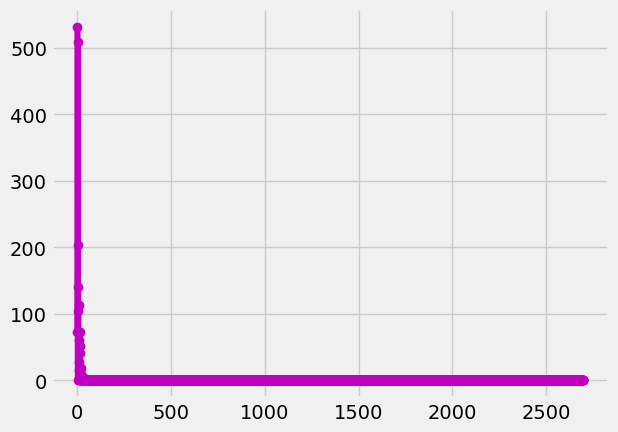

C:\Users\2ha M2li322\AppData\Local\Temp\ipykernel_6172\3855050061.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mo" (-> color='m'). The keyword argument will take precedence.
  plt.plot( Theta_0,loss,'-mo',color='blue')


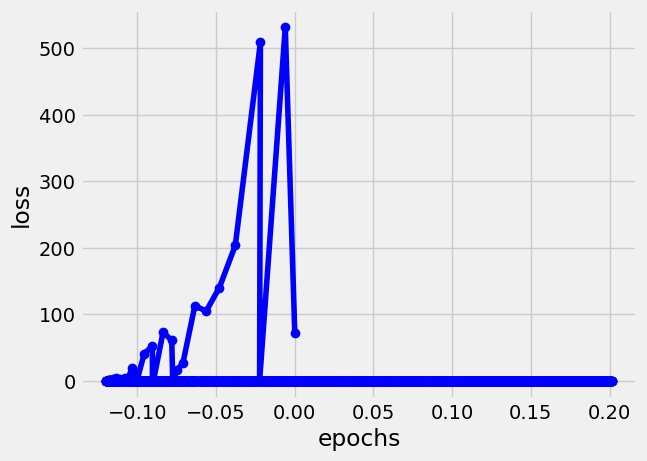

C:\Users\2ha M2li322\AppData\Local\Temp\ipykernel_6172\3855050061.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mo" (-> color='m'). The keyword argument will take precedence.
  plt.plot( Theta_1,loss,'-mo',color='blue')


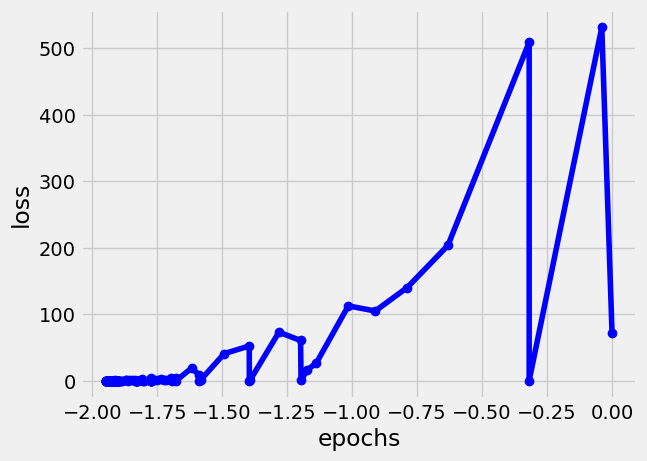

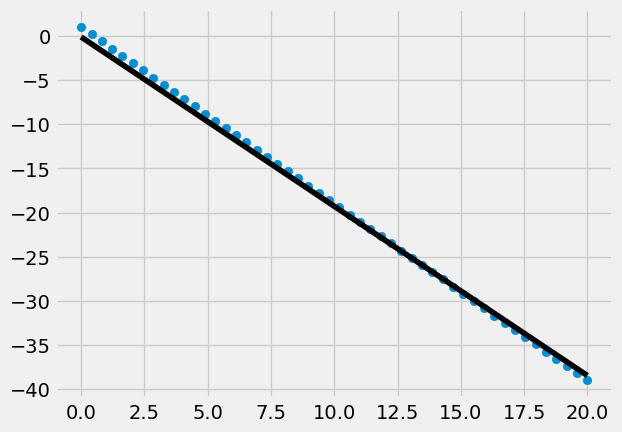

In [37]:
plt.plot(loss,'-mo')
plt.show()

plt.plot( Theta_0,loss,'-mo',color='blue')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

plt.plot( Theta_1,loss,'-mo',color='blue')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

plt.scatter( X,y, marker="o" )
plt.plot( X,hx, color="black")
plt.show()

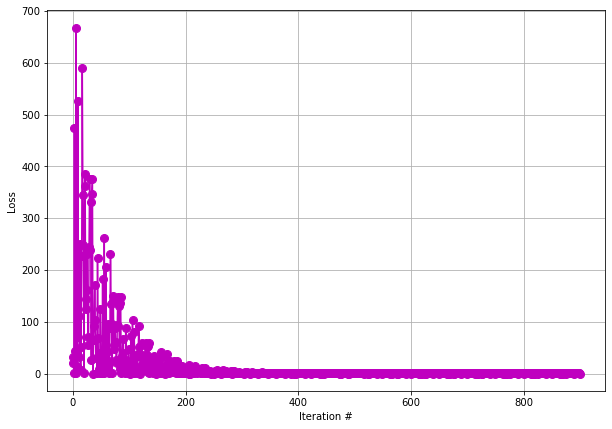

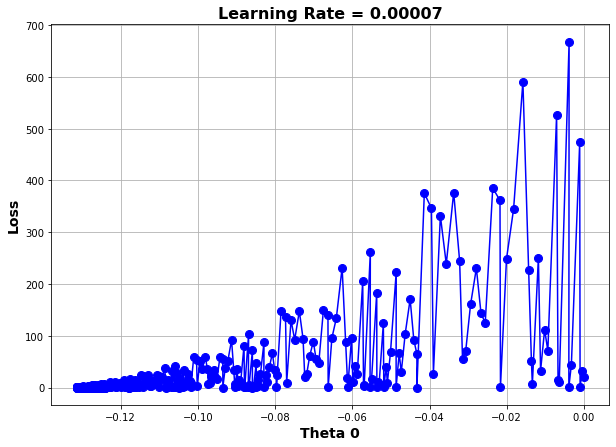

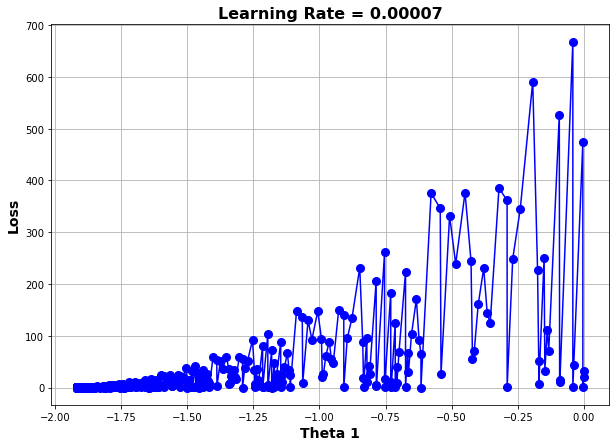

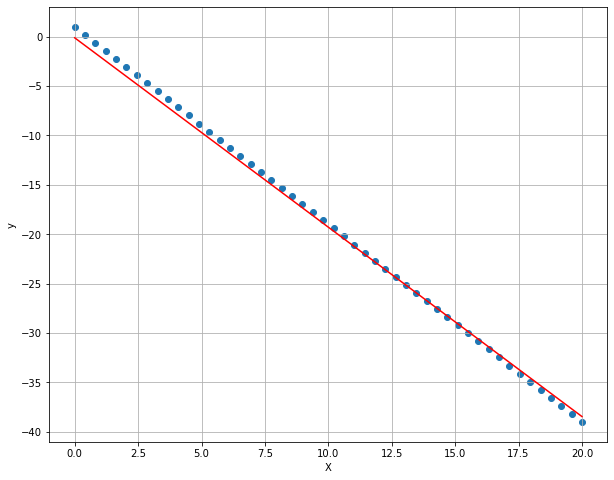

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

In [142]:
def mini(X ,y , rate ,max_it,bs):
    D= np.concatenate((X.reshape(-1,1),y.reshape(-1,1)),axis=1)
    np.random.shuffle(D)
    X = D[:,0]
    y = D[:,1]  
    m = len(X)
    theta_0 , theta_1 = 0,0
    loss=[]
    Theta_0=[]
    Theta_1=[]
    h_prdict=[]
    ch=0
    b=m//bs

    
    
    epoch = max_it
    for e in range(0,epoch):
        for i in range(0,b):   
            s=i*bs
            en=(i*bs)+bs
            Theta_0.append(theta_0)
            Theta_1.append(theta_1)

            h_x = theta_0 + theta_1 * X[s:en]
            err= (h_x - y[s:en])
            j = (1/2*bs) * sum(err**2)
            loss.append(j)

            d_theta_0= sum(err)/bs
            d_theta_1= sum(err * X[s:en])/bs

            G_V= np.array([[d_theta_0],[d_theta_1]])

            G_norm = np.linalg.norm(G_V)

            theta_0 = theta_0 - rate * d_theta_0 
            theta_1 = theta_1 - rate * d_theta_1 
            
        print(f"\n******* Epoch {e} *******")
        print("\ncost :\n",j)
        print("\nGradient Vector :\n",G_V)
        print("\nGradient Vector Norm :\n",G_norm)
        print("\ntheta_0_new : ",theta_0)
        print("theta_1_new : ",theta_1)   
        
        if e>0 and abs(loss[e*b] - loss[(e-1)*b]) <= 0.001:
            print('Epoch:',e)
            break

        if G_norm <= 0.001:
            print('Epoch:',e)
            break
             
# ****** Training Report ********
    print("\n******* Training Report *******")
    print(f"\nGradient Descent converged after {i+1} iterations {e} Epochs")
    
    print("\ntheta_0_Opt : " ,theta_0)
    print("theta_1_Opt : " ,theta_1)
    print("\ncost : ",j)
    print()    
    
    
    return Theta_0, Theta_1 , loss,h_prdict

In [143]:
Theta_0, Theta_1 , loss,h_prdict = mini (  X , y, 0.0005 ,300,5 )


******* Epoch 0 *******

cost :
 2903.170275184353

Gradient Vector :
 [[ 13.55222206]
 [216.29542484]]

Gradient Vector Norm :
 216.719573478769

theta_0_new :  -0.07129578975463433
theta_1_new :  -0.9676694555391513

******* Epoch 1 *******

cost :
 730.517772285234

Gradient Vector :
 [[  6.68260176]
 [108.33889428]]

Gradient Vector Norm :
 108.54479803071516

theta_0_new :  -0.10584969573663042
theta_1_new :  -1.4467325080253348

******* Epoch 2 *******

cost :
 189.7563773356331

Gradient Vector :
 [[ 3.28208445]
 [54.89739394]]

Gradient Vector Norm :
 54.9954174380322

theta_0_new :  -0.12221684218932138
theta_1_new :  -1.683929027998161

******* Epoch 3 *******

cost :
 53.10345707530306

Gradient Vector :
 [[ 1.59881775]
 [28.44153782]]

Gradient Vector Norm :
 28.48644049206992

theta_0_new :  -0.12958225340181334
theta_1_new :  -1.8013984296205734

******* Epoch 4 *******

cost :
 17.565352061291946

Gradient Vector :
 [[ 0.76561218]
 [15.34392528]]

Gradient Vector Norm :

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

****************** Epoch 0 ********************

Cost = 4.756947839402018

Gradient Vector:
[[ 8.22967595]
 [96.72704965]]

Gradient Vector Norm:
97.07651466963269

theta_0_new : -0.06646182531835047
theta_1_new : -0.9256821913217486

****************** Epoch 1 ********************

Cost = 1.122060441600775

Gradient Vector:
[[ 3.83507638]
 [46.73760466]]

Gradient Vector Norm:
46.89468519790215

theta_0_new : -0.10259516119797818
theta_1_new : -1.4293728638220262

****************** Epoch 2 ********************

Cost = 0.2643644845972613

Gradient Vector:
[[ 1.67586431]
 [22.1741011 ]]

Gradient Vector Norm:
22.23733978351637

theta_0_new : -0.11960676915575022
theta_1_new : -1.6769384840774493

****************** Epoch 3 ********************

Cost = 0.06706361377523971

Gradient Vector:
[[ 0.61510837]
 [10.10475679]]

Gradient Vector Norm:
10.12346127220413

theta_0_new : -0.12722302765329713
theta_1_new : -1.7986456643566977

****************** Epoch 4 ********************

Cost = 0

In [144]:
hx=theta_0[-1] + theta_1[-1]*X
from sklearn.metrics import r2_score
r2_score(y,hx)

0.9976265938305019

r2_score 0.9974493632266231


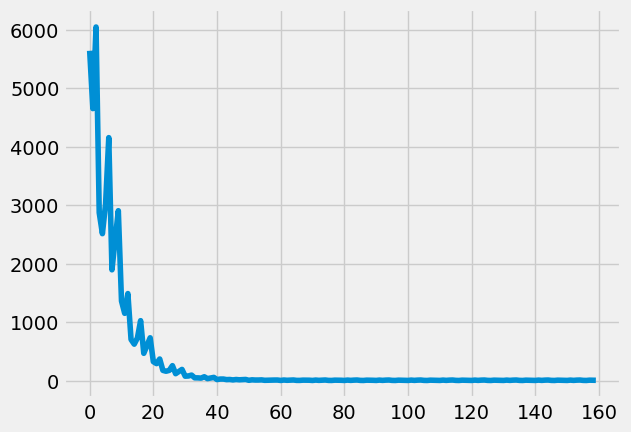

C:\Users\2ha M2li322\AppData\Local\Temp\ipykernel_6172\2655544591.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mo" (-> color='m'). The keyword argument will take precedence.
  plt.plot( Theta_0,loss,'-mo',color='blue')


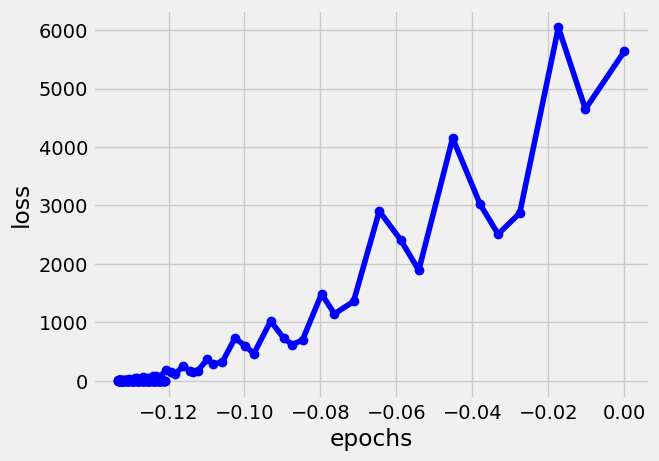

C:\Users\2ha M2li322\AppData\Local\Temp\ipykernel_6172\2655544591.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mo" (-> color='m'). The keyword argument will take precedence.
  plt.plot( Theta_1,loss,'-mo',color='blue')


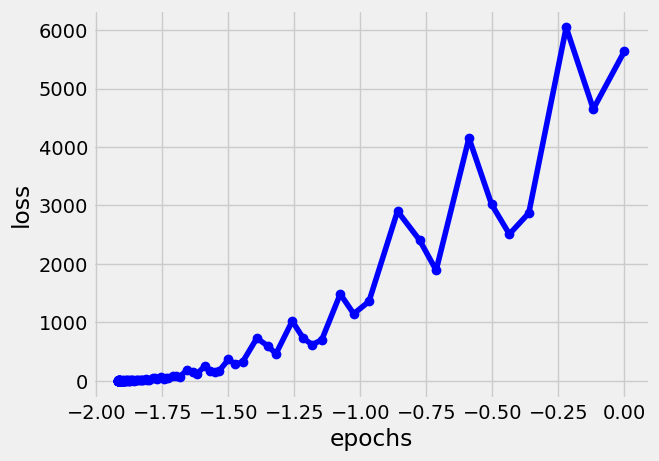

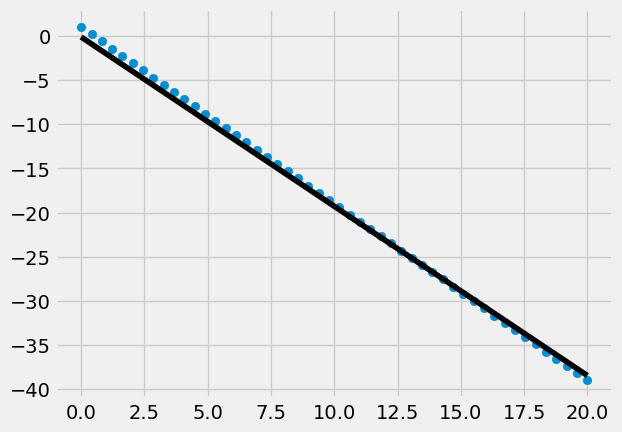

In [145]:
plt.plot(loss)
plt.show()


plt.plot( Theta_0,loss,'-mo',color='blue')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

plt.plot( Theta_1,loss,'-mo',color='blue')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

plt.scatter( X,y, marker="o" )
plt.plot( X,hx, color="black")
plt.show()

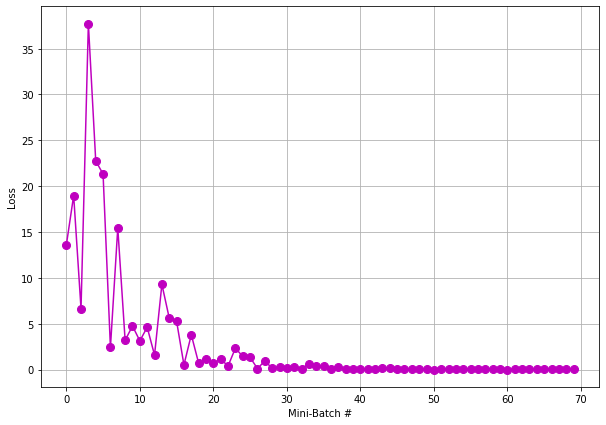

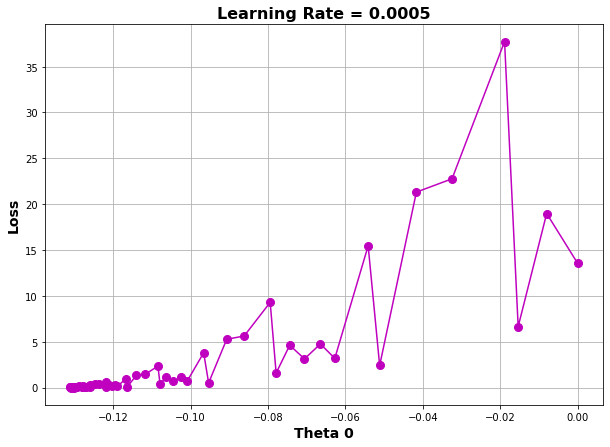

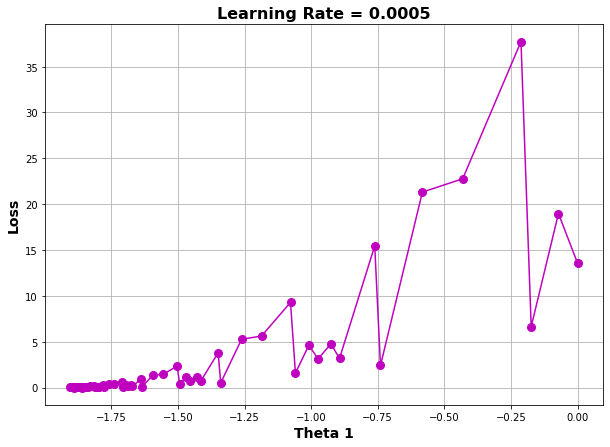

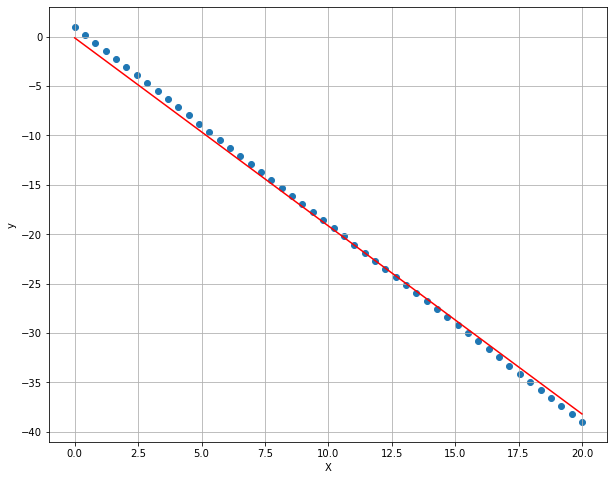

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [146]:
mini (  X , y, 0.0005 ,300,10 )


******* Epoch 0 *******

cost :
 5302.4817151647585

Gradient Vector :
 [[ 7.90564125]
 [77.69514663]]

Gradient Vector Norm :
 78.096318563046

theta_0_new :  -0.04139961669662723
theta_1_new :  -0.5683398074210116

******* Epoch 1 *******

cost :
 2572.53315732723

Gradient Vector :
 [[ 5.37265325]
 [54.00208707]]

Gradient Vector Norm :
 54.268690890734604

theta_0_new :  -0.07029645708058183
theta_1_new :  -0.9680315613057657

******* Epoch 2 *******

cost :
 1241.2851357343422

Gradient Vector :
 [[ 3.59149095]
 [37.34074081]]

Gradient Vector Norm :
 37.51306080813269

theta_0_new :  -0.09040106495690735
theta_1_new :  -1.2491243398470337

******* Epoch 3 *******

cost :
 596.1499323938291

Gradient Vector :
 [[ 2.3390376]
 [25.6243308]]

Gradient Vector Norm :
 25.73086523501069

theta_0_new :  -0.10432281903227544
theta_1_new :  -1.4468143326785459

******* Epoch 4 *******

cost :
 286.3897774235949

Gradient Vector :
 [[ 1.45839004]
 [17.38536548]]

Gradient Vector Norm :
 17


******* Epoch 91 *******

cost :
 24.030879863707938

Gradient Vector :
 [[-0.59524717]
 [-2.02519453]]

Gradient Vector Norm :
 2.1108605023019917

theta_0_new :  -0.07655346488280637
theta_1_new :  -1.919797496518148

******* Epoch 92 *******

cost :
 24.000083074247975

Gradient Vector :
 [[-0.59486563]
 [-2.02389642]]

Gradient Vector Norm :
 2.1095074813585923

theta_0_new :  -0.07586341483763356
theta_1_new :  -1.9198489047788254

******* Epoch 93 *******

cost :
 23.96932575243295

Gradient Vector :
 [[-0.59448433]
 [-2.02259914]]

Gradient Vector Norm :
 2.108155327675503

theta_0_new :  -0.07517380710125478
theta_1_new :  -1.919900280087796

******* Epoch 94 *******

cost :
 23.938607847683144

Gradient Vector :
 [[-0.59410328]
 [-2.02130269]]

Gradient Vector Norm :
 2.106804040696839

theta_0_new :  -0.07448464139015859
theta_1_new :  -1.919951622466182

******* Epoch 95 *******

cost :
 23.90792930948365

Gradient Vector :
 [[-0.59372247]
 [-2.02000707]]

Gradient Vector N


******* Epoch 203 *******

cost :
 20.815833876411286

Gradient Vector :
 [[-0.55399955]
 [-1.88485877]]

Gradient Vector Norm :
 1.9645885297639858

theta_0_new :  -0.001953746578218101
theta_1_new :  -1.9253551249706624

******* Epoch 204 *******

cost :
 20.789157331191777

Gradient Vector :
 [[-0.55364444]
 [-1.88365061]]

Gradient Vector Norm :
 1.9633292663386575

theta_0_new :  -0.001311513516283746
theta_1_new :  -1.9254029708984923

******* Epoch 205 *******

cost :
 20.76251497331597

Gradient Vector :
 [[-0.55328957]
 [-1.88244323]]

Gradient Vector Norm :
 1.9620708100769724

theta_0_new :  -0.0006696921133778138
theta_1_new :  -1.925450786158004

******* Epoch 206 *******

cost :
 20.735906758970906

Gradient Vector :
 [[-0.55293492]
 [-1.88123662]]

Gradient Vector Norm :
 1.9608131604615358

theta_0_new :  -2.8282105634791033e-05
theta_1_new :  -1.9254985707688543

******* Epoch 207 *******

cost :
 20.709332644399943

Gradient Vector :
 [[-0.5525805 ]
 [-1.88003078]]




******* Epoch 292 *******

cost :
 18.570657590453663

Gradient Vector :
 [[-0.52327037]
 [-1.78030967]]

Gradient Vector Norm :
 1.8556169832590272

theta_0_new :  0.05362249630260455
theta_1_new :  -1.9294955173975648

******* Epoch 293 *******

cost :
 18.54685835233964

Gradient Vector :
 [[-0.52293496]
 [-1.77916852]]

Gradient Vector Norm :
 1.8544275684971179

theta_0_new :  0.05422910606280661
theta_1_new :  -1.92954070941356

******* Epoch 294 *******

cost :
 18.523089614154497

Gradient Vector :
 [[-0.52259977]
 [-1.77802811]]

Gradient Vector Norm :
 1.8532389161271603

theta_0_new :  0.054835326997830836
theta_1_new :  -1.929585872462343

******* Epoch 295 *******

cost :
 18.49935133681093

Gradient Vector :
 [[-0.5222648 ]
 [-1.77688843]]

Gradient Vector Norm :
 1.852051025660493

theta_0_new :  0.05544115935690668
theta_1_new :  -1.9296310065624813

******* Epoch 296 *******

cost :
 18.47564348127189

Gradient Vector :
 [[-0.52193003]
 [-1.77574948]]

Gradient Vector

([0,
  -0.009173469387755102,
  -0.018519532815833538,
  -0.02723131008815246,
  -0.03744679607184582,
  -0.04139961669662723,
  -0.04780347741156912,
  -0.05433922663356656,
  -0.060429447133267714,
  -0.06761013045494729,
  -0.07029645708058183,
  -0.07475266640246059,
  -0.07931213199614046,
  -0.08355880908767205,
  -0.0886053194829169,
  -0.09040106495690735,
  -0.09348765078067896,
  -0.09665735099322464,
  -0.09960760974166417,
  -0.1031533002318741,
  -0.10432281903227544,
  -0.10644626993204878,
  -0.10863866404220271,
  -0.11067726112023593,
  -0.11316752678123414,
  -0.11389672180085496,
  -0.11534289414965901,
  -0.11684803733442439,
  -0.11824554651798959,
  -0.11999360409718109,
  -0.12041320844410368,
  -0.12138312600711462,
  -0.12240499477569444,
  -0.12335169259988683,
  -0.12457780661299636,
  -0.12477975615319982,
  -0.12541478556184152,
  -0.1260968230185558,
  -0.12672651830683995,
  -0.1275855861441512,
  -0.12763453322235613,
  -0.12803408821166845,
  -0.1284771

****************** Epoch 0 ********************

Cost = 22.539550396010963

Gradient Vector:
[[ 11.67472803]
 [157.10281459]]

Gradient Vector Norm:
157.53600739932955

theta_0_new : -0.03545598365437756
theta_1_new : -0.48835190145126706

****************** Epoch 1 ********************

Cost = 11.174953219348621

Gradient Vector:
[[  8.09250368]
 [110.51346525]]

Gradient Vector Norm:
110.80936160035174

theta_0_new : -0.06610051885857628
theta_1_new : -0.9107485292034476

****************** Epoch 2 ********************

Cost = 5.548346857077597

Gradient Vector:
[[ 5.57078759]
 [77.71577392]]

Gradient Vector Norm:
77.91517946195926

theta_0_new : -0.0874575404445202
theta_1_new : -1.2081213319692865

****************** Epoch 3 ********************

Cost = 2.763748611613035

Gradient Vector:
[[ 3.7956429 ]
 [54.62706716]]

Gradient Vector Norm:
54.75877438231161

theta_0_new : -0.10227652151342273
theta_1_new : -1.4174804576423325

****************** Epoch 4 ********************

Cos

In [147]:
hx=theta_0[-1] + theta_1[-1]*X
from sklearn.metrics import r2_score
r2_score(y,hx)

0.9976265938305019

r2_score 0.9976302004574656


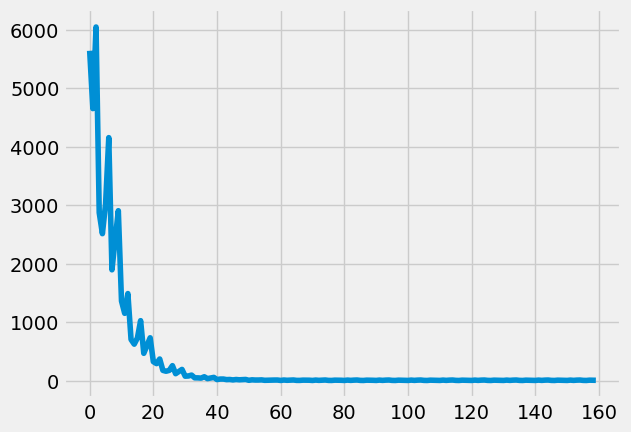

C:\Users\2ha M2li322\AppData\Local\Temp\ipykernel_6172\2655544591.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mo" (-> color='m'). The keyword argument will take precedence.
  plt.plot( Theta_0,loss,'-mo',color='blue')


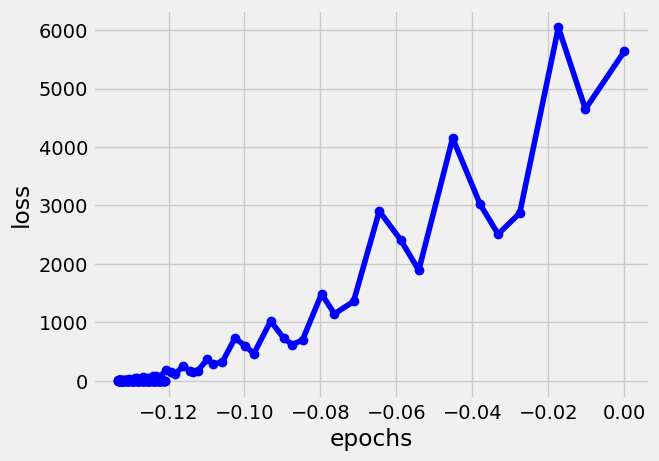

C:\Users\2ha M2li322\AppData\Local\Temp\ipykernel_6172\2655544591.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mo" (-> color='m'). The keyword argument will take precedence.
  plt.plot( Theta_1,loss,'-mo',color='blue')


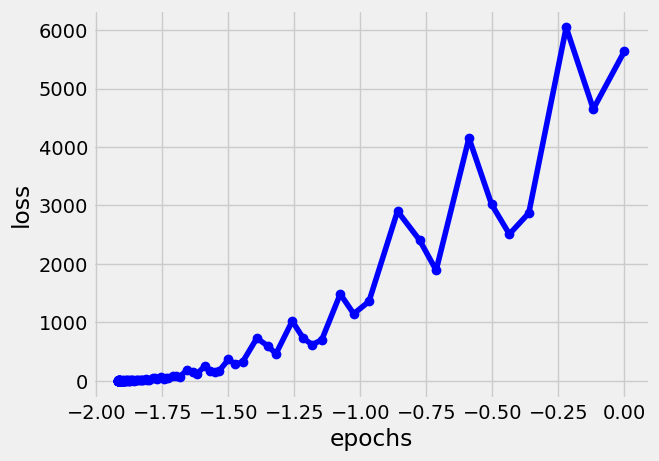

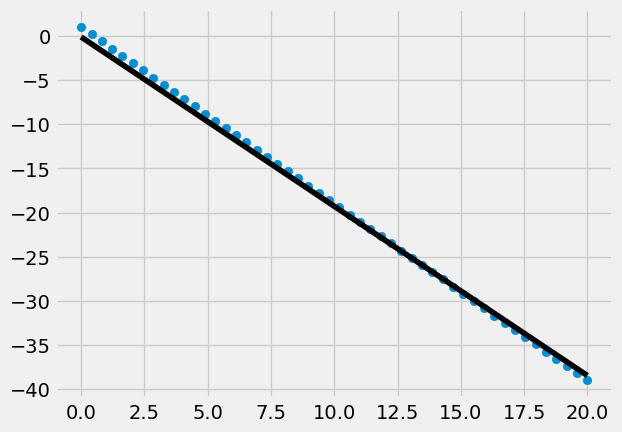

In [148]:
plt.plot(loss)
plt.show()


plt.plot( Theta_0,loss,'-mo',color='blue')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

plt.plot( Theta_1,loss,'-mo',color='blue')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

plt.scatter( X,y, marker="o" )
plt.plot( X,hx, color="black")
plt.show()

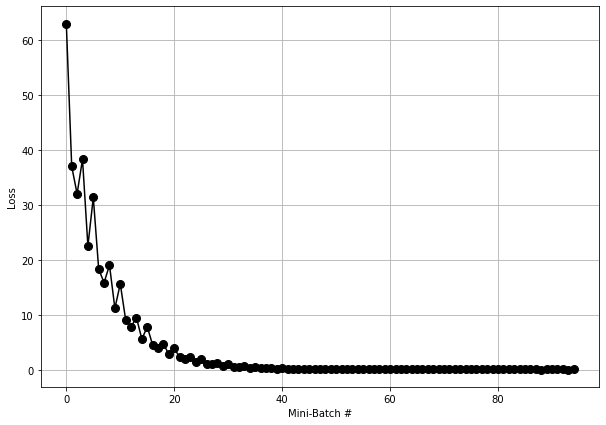

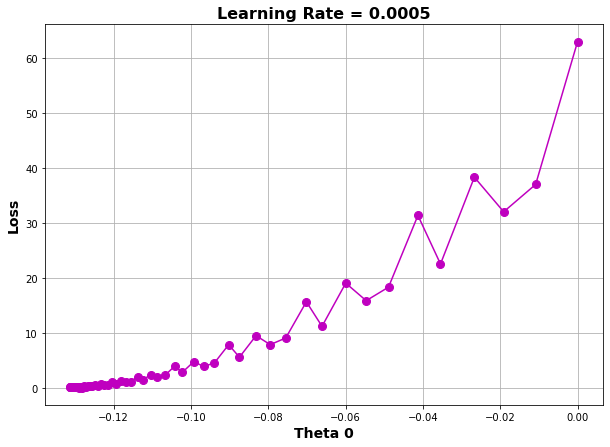

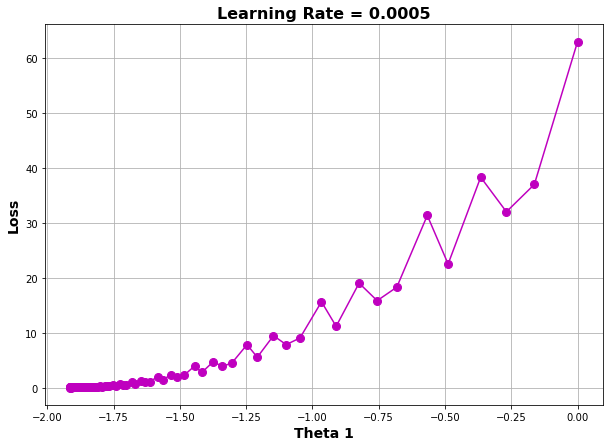

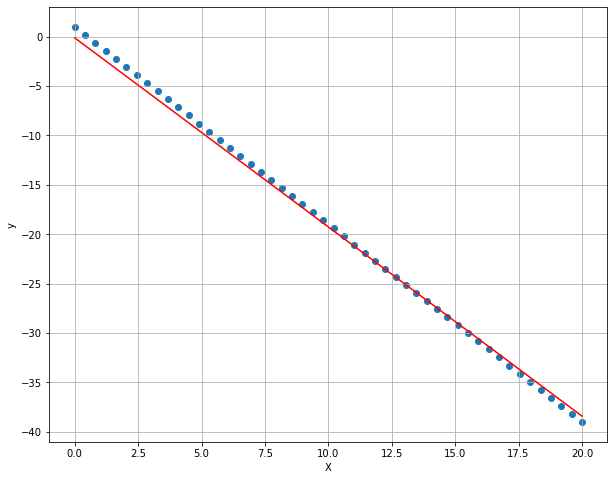

In [149]:
mini ( X , y, 0.0005 ,300,20)


******* Epoch 0 *******

cost :
 75601.50732059812

Gradient Vector :
 [[ 16.16687251]
 [214.57754076]]

Gradient Vector Norm :
 215.18570762341034

theta_0_new :  -0.019093640339059408
theta_1_new :  -0.26948035721866204

******* Epoch 1 *******

cost :
 55810.57935112029

Gradient Vector :
 [[ 13.84306344]
 [184.33608919]]

Gradient Vector Norm :
 184.85514378044033

theta_0_new :  -0.0354649423675382
theta_1_new :  -0.5011009359458486

******* Epoch 2 *******

cost :
 41198.5003335556

Gradient Vector :
 [[ 11.84576815]
 [158.34365759]]

Gradient Vector Norm :
 158.78613328364813

theta_0_new :  -0.04949641103219112
theta_1_new :  -0.7001811257260829

******* Epoch 3 *******

cost :
 30411.069635287866

Gradient Vector :
 [[ 10.12911065]
 [136.00324841]]

Gradient Vector Norm :
 136.37991956834514

theta_0_new :  -0.061516808409106234
theta_1_new :  -0.871292929034333

******* Epoch 4 *******

cost :
 22448.052798835713

Gradient Vector :
 [[  8.65366067]
 [116.80174367]]

Gradient


******* Epoch 149 *******

cost :
 68.78613696145263

Gradient Vector :
 [[-0.35951467]
 [-0.63754262]]

Gradient Vector Norm :
 0.7319230734782509

theta_0_new :  -0.09629163630755937
theta_1_new :  -1.9208365136656407

******* Epoch 150 *******

cost :
 68.75197507205215

Gradient Vector :
 [[-0.35942538]
 [-0.63738429]]

Gradient Vector Norm :
 0.731741304393021

theta_0_new :  -0.09601937173904446
theta_1_new :  -1.9208561739935517

******* Epoch 151 *******

cost :
 68.71783014732343

Gradient Vector :
 [[-0.35933612]
 [-0.637226  ]]

Gradient Vector Norm :
 0.7315595798358392

theta_0_new :  -0.09574717478719777
theta_1_new :  -1.9208758294336332

******* Epoch 152 *******

cost :
 68.68370217904743

Gradient Vector :
 [[-0.35924688]
 [-0.63706774]]

Gradient Vector Norm :
 0.7313778998820003

theta_0_new :  -0.09547504543527899
theta_1_new :  -1.9208954799878266

******* Epoch 153 *******

cost :
 68.64959115897985

Gradient Vector :
 [[-0.35915766]
 [-0.63690953]]

Gradient Ve

([0,
  -0.011010204081632655,
  -0.019093640339059408,
  -0.0285434106467335,
  -0.0354649423675382,
  -0.043573526958870165,
  -0.04949641103219112,
  -0.056452253082700424,
  -0.061516808409106234,
  -0.06748187437250001,
  -0.07180870470674647,
  -0.07692220435823778,
  -0.08061496833483889,
  -0.08499655213940026,
  -0.08814434410292085,
  -0.09189685134558102,
  -0.09457624766852701,
  -0.09778806846572825,
  -0.10006488635383429,
  -0.10281199179649309,
  -0.10474280097762234,
  -0.1070904880341902,
  -0.10872391005129517,
  -0.11072830130772789,
  -0.11210612625801425,
  -0.11381545894065581,
  -0.11497360531019843,
  -0.11642933919783854,
  -0.11739867883711731,
  -0.11863644850873084,
  -0.11944351569711259,
  -0.12049394898649328,
  -0.12116154987144258,
  -0.12205097132698536,
  -0.12259870773559531,
  -0.1233497432422813,
  -0.12379446289601999,
  -0.12442655934655338,
  -0.1247827428197518,
  -0.1253126147706476,
  -0.12559270808038614,
  -0.12603472165179977,
  -0.1262494

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

****************** Epoch 0 ********************

Cost = 126.24663174567475

Gradient Vector:
[[ 17.2116263 ]
 [234.92496791]]

Gradient Vector Norm:
235.5546234500846

theta_0_new : -0.009846938775510204
theta_1_new : -0.13470991253644315

****************** Epoch 1 ********************

Cost = 95.2117173776487

Gradient Vector:
[[ 14.90431582]
 [203.99105181]]

Gradient Vector Norm:
204.53480840347603

theta_0_new : -0.026985858149656733
theta_1_new : -0.369149480457521

****************** Epoch 2 ********************

Cost = 71.8119173096046

Gradient Vector:
[[ 12.90081071]
 [177.13009011]]

Gradient Vector Norm:
177.5992672864237

theta_0_new : -0.041830281557401115
theta_1_new : -0.5727240764439553

****************** Epoch 3 ********************

Cost = 54.168934578029884

Gradient Vector:
[[ 11.16111006]
 [153.80581204]]

Gradient Vector Norm:
154.21024024297918

theta_0_new : -0.05468232631950523
theta_1_new : -0.7494975760087796

****************** Epoch 4 ********************

In [150]:
hx=theta_0[-1] + theta_1[-1]*X
from sklearn.metrics import r2_score
r2_score(y,hx)

0.9976265938305019

r2_score 0.9975575226128095


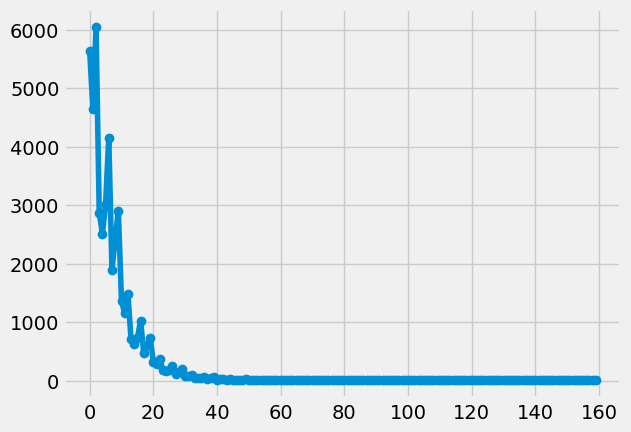

C:\Users\2ha M2li322\AppData\Local\Temp\ipykernel_6172\3989941775.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mo" (-> color='m'). The keyword argument will take precedence.
  plt.plot( Theta_0,loss,'-mo',color='blue')


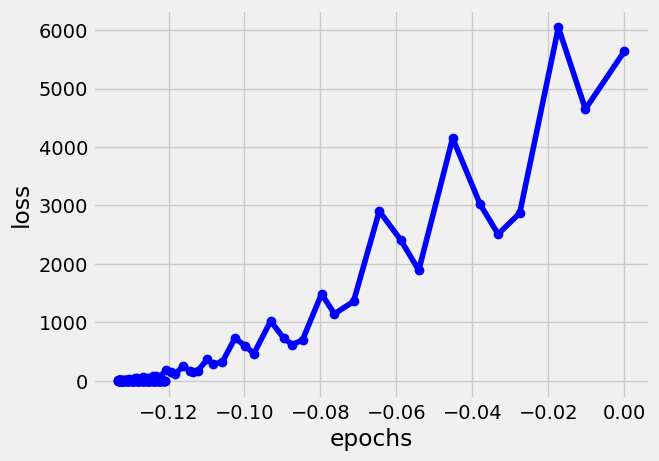

C:\Users\2ha M2li322\AppData\Local\Temp\ipykernel_6172\3989941775.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mo" (-> color='m'). The keyword argument will take precedence.
  plt.plot( Theta_1,loss,'-mo',color='blue')


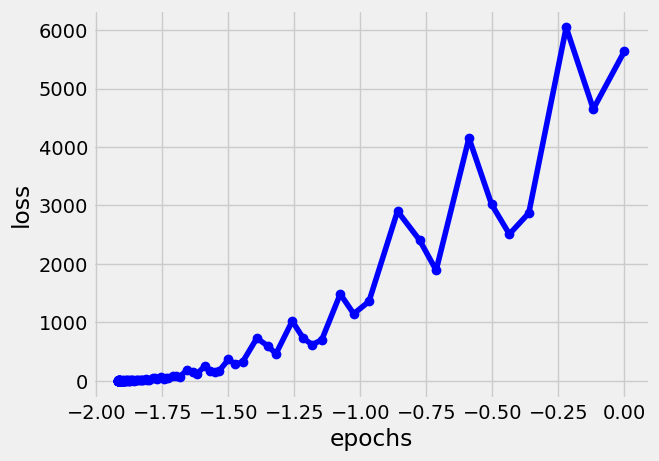

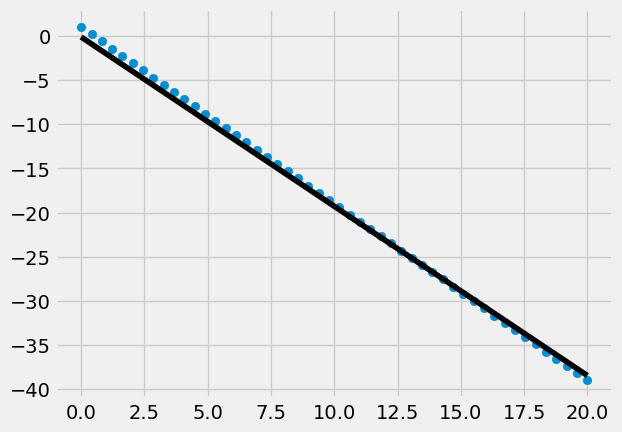

In [151]:
plt.plot(loss, marker="o" )
plt.show()


plt.plot( Theta_0,loss,'-mo',color='blue')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

plt.plot( Theta_1,loss,'-mo',color='blue')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

plt.scatter( X,y, marker="o" )
plt.plot( X,hx, color="black")
plt.show()

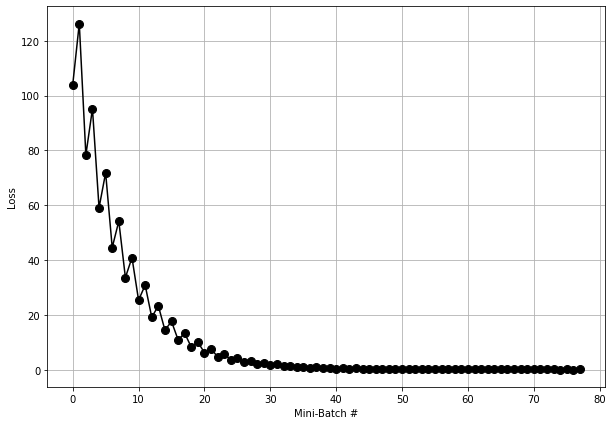

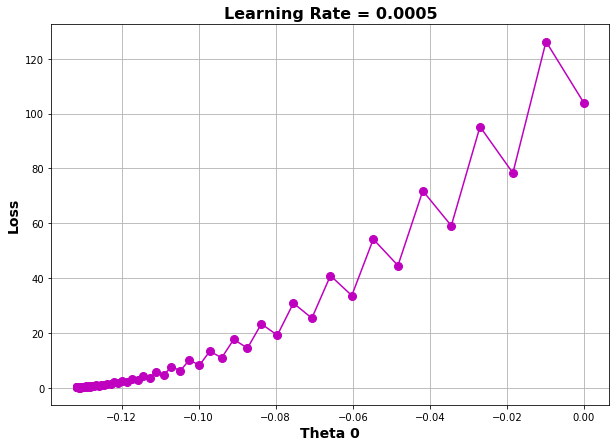

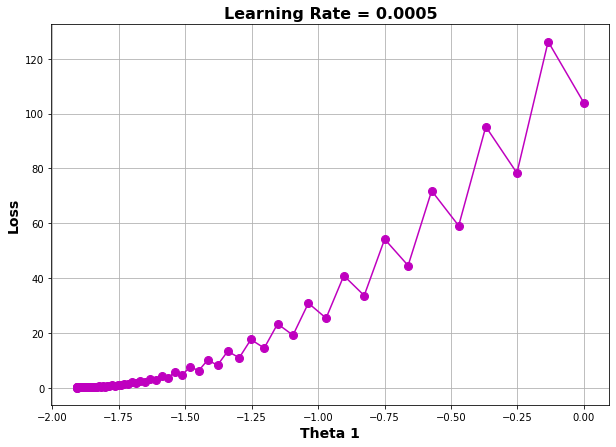

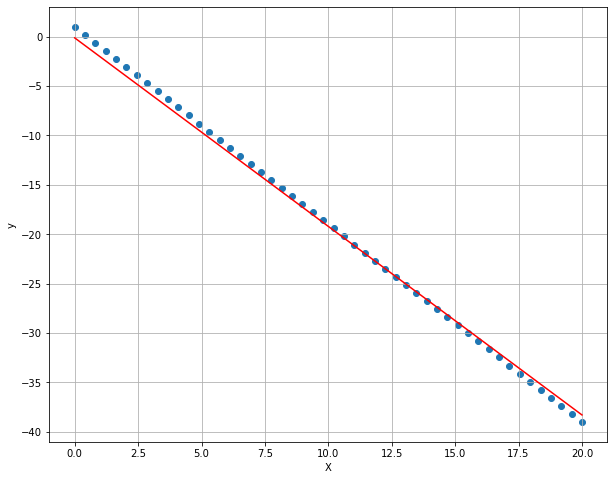